<a href="https://colab.research.google.com/github/PaoPla/Evaluaci-n/blob/main/Evaluacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EVALUACION**
**Paola Plascenci Rey - A01707495**

In [263]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
from google.colab import files

In [265]:
#files.upload()

In [266]:
#Carga desde un archivo .csv sin indice
california = pd.read_csv("California_EUA.csv", index_col=0)
mexico = pd.read_csv("DF_Mexico.csv",index_col=0)
espana = pd.read_csv("Girona_España.csv",encoding= 'unicode_escape',index_col=0)

# **MEXICO**

In [267]:
#Verificamos información del DataFrame
mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19432 entries, 2056638 to 726199896909683260
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   19432 non-null  object 
 1   scrape_id                                     19432 non-null  int64  
 2   last_scraped                                  19432 non-null  object 
 3   source                                        19432 non-null  object 
 4   name                                          19431 non-null  object 
 5   description                                   18616 non-null  object 
 6   neighborhood_overview                         12802 non-null  object 
 7   picture_url                                   19432 non-null  object 
 8   host_id                                       19432 non-null  int64  
 9   host_url                                  

##**VALORES NULOS**

In [268]:
#Corroboramos valores nulos
mexico.isnull().sum().sum()

141481

In [269]:
#Debido a que la variable de price esta como string, esta se cambia a float y se eliminan los signos de pesos y comas.
mexico.price= mexico.price.replace({'\$':''}, regex = True)
mexico.price= mexico.price.replace({'\,':''}, regex = True)
mexico['price'] = mexico['price'].astype(float)

In [270]:
#Separamos la data frame en cualitativas y cunatitativas
cuanM = mexico.select_dtypes(include=[np.float, np.int])
cualiM = mexico.select_dtypes(include=[np.object])

<ipython-input-270-43b6879ca6e1>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanM = mexico.select_dtypes(include=[np.float, np.int])
<ipython-input-270-43b6879ca6e1>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [271]:
#Vemos los valores nulos por columna
cualiM.isnull().sum()

listing_url                  0
last_scraped                 0
source                       0
name                         1
description                816
neighborhood_overview     6630
picture_url                  0
host_url                     0
host_name                    1
host_since                   1
host_location             3409
host_about                8162
host_response_time        2785
host_response_rate        2785
host_acceptance_rate      1690
host_is_superhost            6
host_thumbnail_url           1
host_picture_url             1
host_neighbourhood        9612
host_verifications           1
host_has_profile_pic         1
host_identity_verified       1
neighbourhood             6631
neighbourhood_cleansed       1
property_type                1
room_type                    1
bathrooms_text              31
amenities                    1
has_availability             1
calendar_last_scraped        1
first_review              2005
last_review               2005
instant_

In [272]:
#Remplazamos valores nulos por "--", para que no haya confusion posteriormente con cuales datos no han sido rellenados
cualiM= cualiM.fillna("--")

In [273]:
#corroboramos que no hay valores nulos
cualiM.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
instant_bookable          0
dtype: int64

In [274]:
#Checamos que columnas tienen valores nulos
cuanM.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                                 1
host_total_listings_count                           1
neighbourhood_group_cleansed                    19432
latitude                                            1
longitude                                           1
accommodates                                        1
bathrooms                                       19432
bedrooms                                          493
beds                                              270
price                                               1
minimum_nights                                      1
maximum_nights                                      1
minimum_minimum_nights                              2
maximum_minimum_nights                              2
minimum_maximum_nights                              2
maximum_maximum_nights                              2
minimum_nights_avg_ntm      

In [275]:
#Rellenamos con 0 los valores nulos de las columnas que tiene mas de 4000 valores nulos, siendo que el usar otro metodo afectaria demasiado los resultados
cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']]=cuanM[['neighbourhood_group_cleansed','bathrooms','calendar_updated','license']].fillna(0)

In [276]:
#Verificamos valores nulos
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                                1
host_total_listings_count                          1
neighbourhood_group_cleansed                       0
latitude                                           1
longitude                                          1
accommodates                                       1
bathrooms                                          0
bedrooms                                         493
beds                                             270
price                                              1
minimum_nights                                     1
maximum_nights                                     1
minimum_minimum_nights                             2
maximum_minimum_nights                             2
minimum_maximum_nights                             2
maximum_maximum_nights                             2
minimum_nights_avg_ntm                        

In [277]:
#Debido a que estas dos variables tienen pocos valores nulos los rellenamos con el promedio
#Siendo que son variables que nos hablan de cantidad de cuartos y camas entonces no afecta el poner el promedio
cuanM[["bedrooms", "beds"]]=cuanM[["bedrooms", "beds"]].fillna(round(cuanM[["bedrooms", "beds"]].mean(),1))

In [278]:
#Se utilizo en metodo de fillna para rellenar estas columnas con 0, ya que nos hablan de los scores entonces no seria correcto el afectarlos y darles un score que no obtuvieron
cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]]=cuanM[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month"]].fillna(0)

In [279]:
#La columnas que encontramos con solo un valor nulo se relleno con el promedio, siendo que solo es un valor
cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]]=cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]].fillna(round(cuanM[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "minimum_nights", "maximum_nights"]].mean(),1))

In [280]:
#Verificamos que columnas aun tienen valores nulos
cuanM.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             1
host_total_listings_count                       1
neighbourhood_group_cleansed                    0
latitude                                        1
longitude                                       1
accommodates                                    1
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           1
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [281]:
#Como son columnas con solo 1 valor nulo las rellenamos con 0, con la funcion fillna(0)
cuanM= cuanM.fillna(0)

In [282]:
#Corroboramos que no hay valores nulos
cuanM.isnull().sum().sum()

0

##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

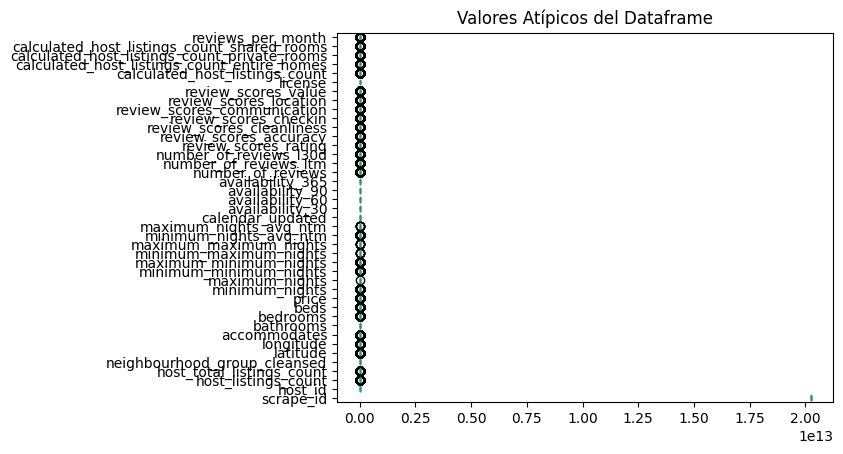

In [283]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanM.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [284]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
#Este metodo se utiliza ya que lo he encontrado mas efectivo que el metodo de desviacion estandar, siendo que este metodo si elimina todos los outliers
#Por otro lado me parece adecuado ya que al utilizar cuartiles en un dataframe tan grande y simetrico ayuda a que exista un mejor resultado de este metodo
y=cuanM

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023033e+13
host_id                                         5.818268e+08
host_listings_count                             2.600000e+01
host_total_listings_count                       2.950000e+01
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        1.950522e+01
longitude                                      -9.911568e+01
accommodates                                    7.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           3.067500e+03
minimum_nights                                  6.000000e+00
maximum_nights                                  2.632500e+03
minimum_minimum_nights                          6.000000e+00
maximum_minimum_nights                          6.000000e+0

In [285]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanM[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

scrape_id  host_id  host_listings_count  \
id                                                            
2056638                   NaN      NaN                  NaN   
2072354                   NaN      NaN                  NaN   
696037                    NaN      NaN                  NaN   
35797                     NaN      NaN                  NaN   
44616                     NaN      NaN                  NaN   
...                       ...      ...                  ...   
724502735720059905        NaN      NaN                  NaN   
724511468729507168        NaN      NaN                  NaN   
721201061962014294        NaN      NaN                  NaN   
721278837482200703        NaN      NaN                 32.0   
726199896909683260        NaN      NaN                  NaN   

                    host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                            
2056638                                   NaN                           NaN   
2072354                                   NaN                           NaN   
696037                                    NaN                           NaN   
35797                                     NaN                           NaN   
44616                                     NaN                           NaN   
...                                       ...                           ...   
724502735720059905                        NaN                           NaN   
724511468729507168                        NaN                           NaN   
721201061962014294                        NaN                           NaN   
721278837482200703                       32.0                           NaN   
726199896909683260                        NaN                           NaN   

                    latitude  longitude  accommodates  bathrooms  bedrooms  \
id                                                                           
2056638                  NaN        NaN           NaN        NaN       NaN   
2072354                  NaN        NaN           NaN        NaN       NaN   
696037                   NaN        NaN           NaN        NaN       NaN   
35797                    NaN -99.271780           NaN        NaN       NaN   
44616                    NaN        NaN          14.0        NaN       5.0   
...                      ...        ...           ...        ...       ...   
724502735720059905       NaN -99.294698           NaN        NaN       NaN   
724511468729507168       NaN -99.294080           NaN        NaN       NaN   
721201061962014294       NaN        NaN           NaN        NaN       NaN   
721278837482200703       NaN        NaN           NaN        NaN       NaN   
726199896909683260       0.0   0.000000           NaN        NaN       NaN   

                    ...  review_scores_checkin  review_scores_communication  \
id                  ...                                                       
2056638             ...                    NaN                          NaN   
2072354             ...                    NaN                          NaN   
696037              ...                    NaN                          NaN   
35797               ...                    0.0                          0.0   
44616               ...                    NaN                          NaN   
...                 ...                    ...                          ...   
724502735720059905  ...                    NaN                          NaN   
724511468729507168  ...                    NaN                          NaN   
721201061962014294  ...                    NaN                          NaN   
721278837482200703  ...                    NaN                          NaN   
726199896909683260  ...                    0.0                          0.0   

                    review_scores_location  review_scores_value  license  \
id                                                   

In [286]:
#Obtenemos datos limpios del Dataframe
cuanM= cuanM[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanM

scrape_id    host_id  host_listings_count  \
id                                                                   
2056638             20230329041210   10531228                  3.0   
2072354             20230329041210   16840050                  3.0   
696037              20230329041210    3531879                  4.0   
35797               20230329041210     153786                  1.0   
44616               20230329041210     196253                 16.0   
...                            ...        ...                  ...   
724502735720059905  20230329041210  223344367                 13.0   
724511468729507168  20230329041210  223344367                 13.0   
721201061962014294  20230329041210  480512123                  1.0   
721278837482200703  20230329041210   42436205                  NaN   
726199896909683260  20230329041210   10764020                  0.0   

                    host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                            
2056638                                   7.0                           0.0   
2072354                                   3.0                           0.0   
696037                                    4.0                           0.0   
35797                                     1.0                           0.0   
44616                                    16.0                           0.0   
...                                       ...                           ...   
724502735720059905                       14.0                           0.0   
724511468729507168                       14.0                           0.0   
721201061962014294                        1.0                           0.0   
721278837482200703                        NaN                           0.0   
726199896909683260                        0.0                           0.0   

                     latitude  longitude  accommodates  bathrooms  bedrooms  \
id                                                                            
2056638             19.353530 -99.162990           3.0        0.0       1.0   
2072354             19.353580 -99.169480           2.0        0.0       1.0   
696037              19.441800 -99.184020           6.0        0.0       3.0   
35797               19.382830        NaN           2.0        0.0       1.0   
44616               19.411620 -99.177940           NaN        0.0       NaN   
...                       ...        ...           ...        ...       ...   
724502735720059905  19.363769        NaN           2.0        0.0       1.0   
724511468729507168  19.364750        NaN           2.0        0.0       1.0   
721201061962014294  19.356113 -99.185024           3.0        0.0       1.0   
721278837482200703  19.443067 -99.176576           4.0        0.0       2.0   
726199896909683260        NaN        NaN           0.0        0.0       1.5   

                    ...  review_scores_checkin  review_scores_communication  \
id                  ...                                                       
2056638             ...                   5.00                         4.95   
2072354             ...                   4.93                         5.00   
696037              ...                   4.92                         4.92   
35797               ...                    NaN                          NaN   
44616               ...                   4.87                         4.78   
...                 ...                    ...                          ...   
724502735720059905  ...                   4.86                         5.00   
724511468729507168  ...                   4.80                         4.93   
721201061962014294  ...                   4.77                         5.00   
721278837482200703  ...                   4.83                         4.83   
726199896909683260  ...                    NaN                          NaN   

                    review_sco

In [287]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanM.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             2488
host_total_listings_count                       2582
neighbourhood_group_cleansed                       0
latitude                                        1076
longitude                                       2093
accommodates                                     793
bathrooms                                          0
bedrooms                                         470
beds                                            1811
price                                           1376
minimum_nights                                  1496
maximum_nights                                     1
minimum_minimum_nights                          1444
maximum_minimum_nights                          1605
minimum_maximum_nights                             5
maximum_maximum_nights                             6
minimum_nights_avg_ntm                        

In [288]:
#Reemplazamos valores atípicos (nulos) del dataframe con "0"
cuanM=cuanM.fillna(round(cuanM.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanM.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [289]:
#Posteriormente al tener las 2 dataframes limpias, realizamos un merge, utilizando el indice como referecnia
mexico2=pd.merge(cualiM,cuanM , left_index=True, right_index=True, how='outer')
mexico2.head()

listing_url last_scraped       source  \
id                                                                        
2056638  https://www.airbnb.com/rooms/2056638   2023-03-30  city scrape   
2072354  https://www.airbnb.com/rooms/2072354   2023-03-30  city scrape   
696037    https://www.airbnb.com/rooms/696037   2023-03-29  city scrape   
35797      https://www.airbnb.com/rooms/35797   2023-03-29  city scrape   
44616      https://www.airbnb.com/rooms/44616   2023-03-30  city scrape   

                                                      name  \
id                                                           
2056638                 Amplio y luminoso loft en Coyoacán   
2072354                 Coyoacan Historic Studio Apartment   
696037   3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...   
35797                                          Villa Dante   
44616                                    CONDESA HAUS  B&B   

                                               description  \
id                                                           
2056638  Cómodo loft de dos pisos magníficamente ubicad...   
2072354  This studio flat is adjacent to the owner's ho...   
696037   Beautifully decorated 3 bedroom apartment, it ...   
35797    Dentro de Villa un estudio de arte con futon, ...   
44616    A new concept of hosting in mexico through a b...   

                                     neighborhood_overview  \
id                                                           
2056638                                                 --   
2072354  Located in Coyoacan, in a quiet neighborhood w...   
696037   This area is called Nuevo Polanco, it has bein...   
35797    Centro comercial Santa Fe, parque interlomas y...   
44616                                                   --   

                                               picture_url  \
id                                                           
2056638  https://a0.muscache.com/pictures/28353712/4379...   
2072354  https://a0.muscache.com/pictures/369f3371-593a...   
696037   https://a0.muscache.com/pictures/10960397/67b2...   
35797    https://a0.muscache.com/pictures/f395ab78-1185...   
44616    https://a0.muscache.com/pictures/251410/ec75fe...   

                                           host_url  \
id                                                    
2056638  https://www.airbnb.com/users/show/10531228   
2072354  https://www.airbnb.com/users/show/16840050   
696037    https://www.airbnb.com/users/show/3531879   
35797      https://www.airbnb.com/users/show/153786   
44616      https://www.airbnb.com/users/show/196253   

                                  host_name  host_since  ...  \
id                                                       ...   
2056638                               Maria  2013-12-09  ...   
2072354                              Mónica  2014-06-16  ...   
696037                     Gonzalo & Sandra  2012-09-10  ...   
35797                                  Dici  2010-06-28  ...   
44616    Condesa Haus Bed & Breakfast  CDMX  2010-08-09  ...   

        review_scores_checkin review_scores_communication  \
id                                                          
2056638                  5.00                        4.95   
2072354                  4.93                        5.00   
696037                   4.92                        4.92   
35797                    4.90                        4.90   
44616                    4.87                        4.78   

        review_scores_location review_scores_value license  \
id                                                           
2056638                   5.00                4.86     0.0   
2072354                   4.95                4.84     0.0   
696037                    4.58                4.71     0.0   
35797                     4.90                4.80     0.0   
44616                     4.98                4.48     0.0   

        calculated_host_listings_count  \
id                          

In [290]:
#Verificamos valores nulos
mexico2.isnull().sum().sum()

0

##**FILTROS**

In [291]:
mexico2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights'

In [292]:
filtro1M= mexico2[mexico2['host_acceptance_rate'] > '50%']
filtro1M['host_acceptance_rate']

id
696037                90%
44616                 86%
2075738               70%
56074                 95%
728372                58%
                     ... 
721182749139458893    99%
724502735720059905    99%
724511468729507168    99%
721201061962014294    96%
721278837482200703    99%
Name: host_acceptance_rate, Length: 7629, dtype: object

In [293]:
filtro2M= mexico2[mexico2['host_is_superhost']== "t"]
filtro2M['host_is_superhost']

id
696037                t
56074                 t
61792                 t
704779                t
728372                t
                     ..
721182749139458893    t
726174383009427223    t
724502735720059905    t
724511468729507168    t
721278837482200703    t
Name: host_is_superhost, Length: 7465, dtype: object

In [294]:
filtro3M= mexico2[mexico2['host_identity_verified']== "f"]
filtro3M['host_identity_verified']

id
2056638               f
131610                f
276504                f
291804                f
298873                f
                     ..
720398306596649630    f
720479274103003657    f
721104633804684261    f
726089104543727016    f
721201061962014294    f
Name: host_identity_verified, Length: 1807, dtype: object

In [295]:
mexico2['property_type'].unique()

array(['Entire loft', 'Entire guest suite', 'Entire rental unit',
       'Entire villa', 'Entire home', 'Entire condo',
       'Private room in home', 'Room in serviced apartment',
       'Entire serviced apartment', 'Private room in rental unit',
       'Private room', 'Tiny home', 'Private room in townhouse',
       'Private room in condo', 'Private room in guest suite',
       'Private room in bed and breakfast', 'Entire guesthouse',
       'Private room in guesthouse', 'Private room in serviced apartment',
       'Shared room in rental unit', 'Room in boutique hotel',
       'Entire bungalow', 'Casa particular', 'Private room in tiny home',
       'Private room in loft', 'Entire townhouse', 'Shared room in condo',
       'Shared room in home', 'Shared room in guesthouse',
       'Room in bed and breakfast', 'Entire cabin',
       'Shared room in hostel', 'Private room in farm stay',
       'Private room in floor', 'Shared room in guest suite',
       'Room in aparthotel', 'Room in 

In [296]:
filtro4M= mexico2[(mexico2['property_type']== 'Private room')|(mexico2['property_type']=='Room in hotel')]
filtro4M['property_type']

id
131610                 Private room
12271259               Private room
16740088              Room in hotel
19639981               Private room
20089283               Private room
                          ...      
714552737912115967    Room in hotel
715853666100681908    Room in hotel
715856288057883575    Room in hotel
715879743206413438    Room in hotel
715882997898897852    Room in hotel
Name: property_type, Length: 298, dtype: object

In [297]:
mexico2['bathrooms']

id
2056638               0.0
2072354               0.0
696037                0.0
35797                 0.0
44616                 0.0
                     ... 
724502735720059905    0.0
724511468729507168    0.0
721201061962014294    0.0
721278837482200703    0.0
726199896909683260    0.0
Name: bathrooms, Length: 19432, dtype: float64

In [298]:
filtro5M= mexico2[mexico2['bathrooms']>1]
filtro5M

Empty DataFrame
Columns: [listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, property_type, room_type, bathrooms_text, amenities, has_availability, calendar_last_scraped, first_review, last_review, instant_bookable, scrape_id, host_id, host_listings_count, host_total_listings_count, neighbourhood_group_cleansed, latitude, longitude, accommodates, bathrooms, bedrooms, beds, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, license, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 74 columns]

In [299]:
filtro6M= mexico2[(mexico2['price'] > 10000) & (mexico2["property_type"] == "Entire home")]
filtro6M[['price','property_type']]

Empty DataFrame
Columns: [price, property_type]
Index: []

In [300]:
filtro7M= mexico2[mexico2['review_scores_cleanliness']>4.5]
filtro7M['review_scores_cleanliness']

id
2056638               4.95
2072354               4.88
696037                4.71
35797                 4.80
44616                 4.70
                      ... 
724502735720059905    5.00
724511468729507168    4.87
721201061962014294    4.92
721278837482200703    5.00
726199896909683260    4.80
Name: review_scores_cleanliness, Length: 18014, dtype: float64

In [301]:
filtro8M= mexico2[mexico2['review_scores_value']>4.9]
filtro8M['review_scores_value']

id
2083241               4.91
67703                 4.91
70644                 4.92
783080                5.00
2118573               4.95
                      ... 
724105189115113667    4.92
724193057873478284    5.00
721123389858788422    5.00
726097900172811344    5.00
726174383009427223    4.93
Name: review_scores_value, Length: 4913, dtype: float64

In [302]:
filtro9M= mexico2[mexico2['availability_365']<100]
filtro9M['availability_365']

id
696037                87.0
131610                88.0
2118573               88.0
187030                 0.0
187745                 0.0
                      ... 
726089104543727016    89.0
726097900172811344    89.0
726146092814278346    58.0
724472674198844048    88.0
726199896909683260     0.0
Name: availability_365, Length: 4428, dtype: float64

In [303]:
filtro10M= mexico2[mexico2['host_response_time']== 'within an hour']
filtro10M['host_response_time']

id
696037                within an hour
44616                 within an hour
56074                 within an hour
61792                 within an hour
704779                within an hour
                           ...      
726174383009427223    within an hour
724502735720059905    within an hour
724511468729507168    within an hour
721201061962014294    within an hour
721278837482200703    within an hour
Name: host_response_time, Length: 13263, dtype: object

##**TABLAS DE FRECUENCIA**

In [304]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(mexico2)

                                           listing_url  frequency  percentage  \
0                 https://www.airbnb.com/rooms/2056638          1    0.000051   
1                https://www.airbnb.com/rooms/51129102          1    0.000051   
2                https://www.airbnb.com/rooms/51219536          1    0.000051   
3                https://www.airbnb.com/rooms/51128837          1    0.000051   
4                https://www.airbnb.com/rooms/51305266          1    0.000051   
...                                                ...        ...         ...   
19427            https://www.airbnb.com/rooms/34306283          1    0.000051   
19428            https://www.airbnb.com/rooms/34306278          1    0.000051   
19429            https://www.airbnb.com/rooms/33885294          1    0.000051   
19430            https://www.airbnb.com/rooms/33881469          1    0.000051   
19431  https://www.airbnb.com/rooms/726199896909683260          1    0.000051   

       cumulative_perc  
0 

In [305]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(mexico2['source'])
table1

source  frequency  percentage  cumulative_perc
0      city scrape      18401    0.946943         0.946943
1  previous scrape       1031    0.053057         1.000000

In [306]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]
Filtro1

source  frequency  percentage  cumulative_perc
0      city scrape      18401    0.946943         0.946943
1  previous scrape       1031    0.053057         1.000000

In [307]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('source')
Filtro1_index

frequency  percentage  cumulative_perc
source                                                 
city scrape          18401    0.946943         0.946943
previous scrape       1031    0.053057         1.000000

Text(0, 0.5, 'Frecuencia')

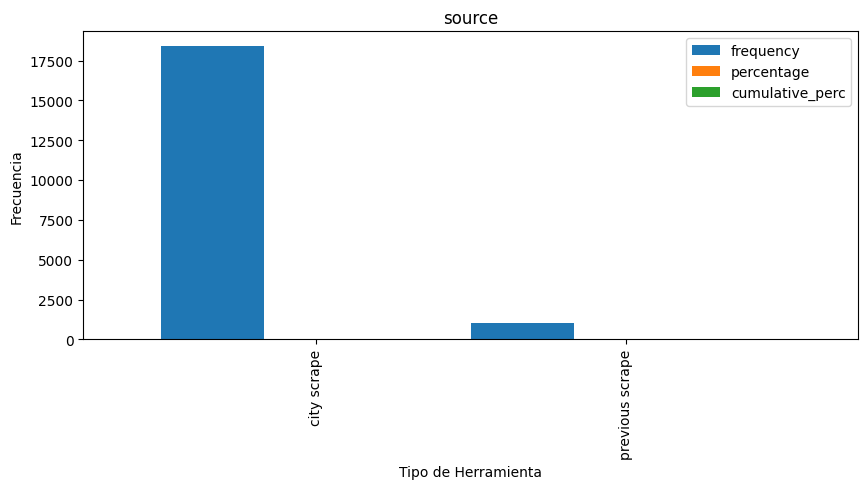

In [308]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('source')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

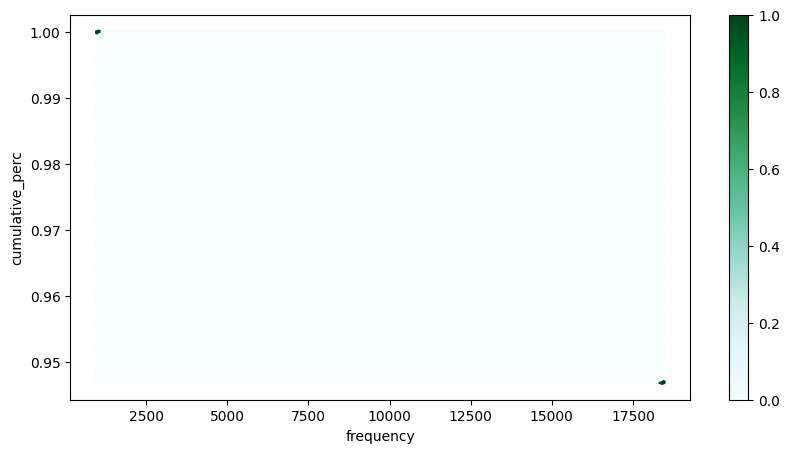

In [309]:
Filtro1_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

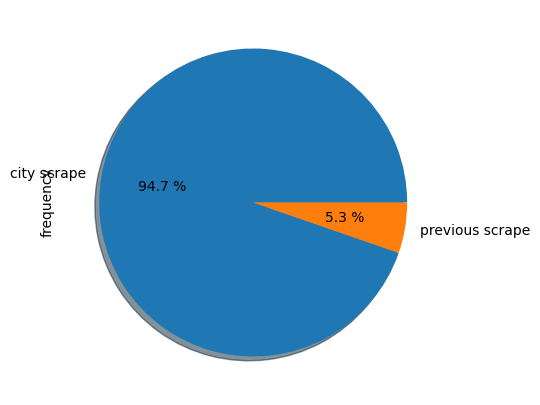

In [310]:
Filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='source'>

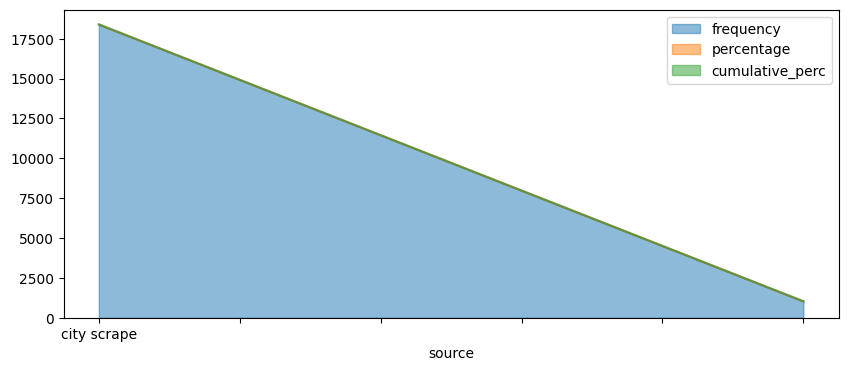

In [311]:
Filtro1_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

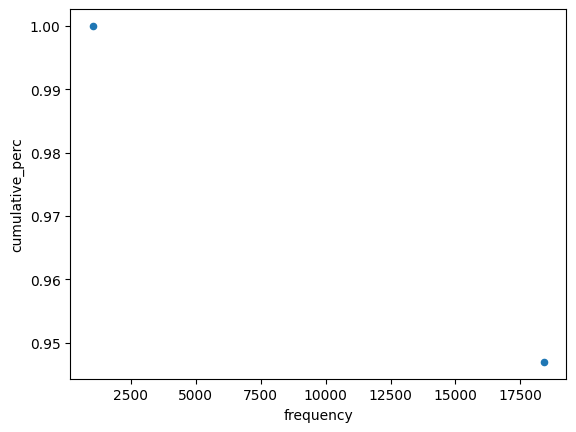

In [312]:
Filtro1_index.plot("frequency", "cumulative_perc", kind="scatter")

In [313]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(mexico2['property_type'])
table2

property_type  frequency  percentage  cumulative_perc
0            Entire rental unit       6061    0.311908         0.311908
1                  Entire condo       2813    0.144761         0.456669
2   Private room in rental unit       2220    0.114245         0.570914
3          Private room in home       1698    0.087382         0.658296
4                   Entire loft       1411    0.072612         0.730908
..                          ...        ...         ...              ...
85                Entire chalet          1    0.000051         0.999794
86                 Earthen home          1    0.000051         0.999846
87       Private room in chalet          1    0.000051         0.999897
88        Private room in floor          1    0.000051         0.999949
89                           --          1    0.000051         1.000000

[90 rows x 4 columns]

In [314]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>1]
Filtro2

property_type  frequency  percentage  cumulative_perc
0             Entire rental unit       6061    0.311908         0.311908
1                   Entire condo       2813    0.144761         0.456669
2    Private room in rental unit       2220    0.114245         0.570914
3           Private room in home       1698    0.087382         0.658296
4                    Entire loft       1411    0.072612         0.730908
..                           ...        ...         ...              ...
67  Shared room in vacation home          2    0.000103         0.998662
68          Private room in dorm          2    0.000103         0.998765
69  Private room in nature lodge          2    0.000103         0.998868
70               Entire bungalow          2    0.000103         0.998971
71     Private room in treehouse          2    0.000103         0.999074

[72 rows x 4 columns]

In [315]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('property_type')
Filtro2_index

frequency  percentage  cumulative_perc
property_type                                                       
Entire rental unit                 6061    0.311908         0.311908
Entire condo                       2813    0.144761         0.456669
Private room in rental unit        2220    0.114245         0.570914
Private room in home               1698    0.087382         0.658296
Entire loft                        1411    0.072612         0.730908
...                                 ...         ...              ...
Shared room in vacation home          2    0.000103         0.998662
Private room in dorm                  2    0.000103         0.998765
Private room in nature lodge          2    0.000103         0.998868
Entire bungalow                       2    0.000103         0.998971
Private room in treehouse             2    0.000103         0.999074

[72 rows x 3 columns]

Text(0, 0.5, 'Frecuencia')

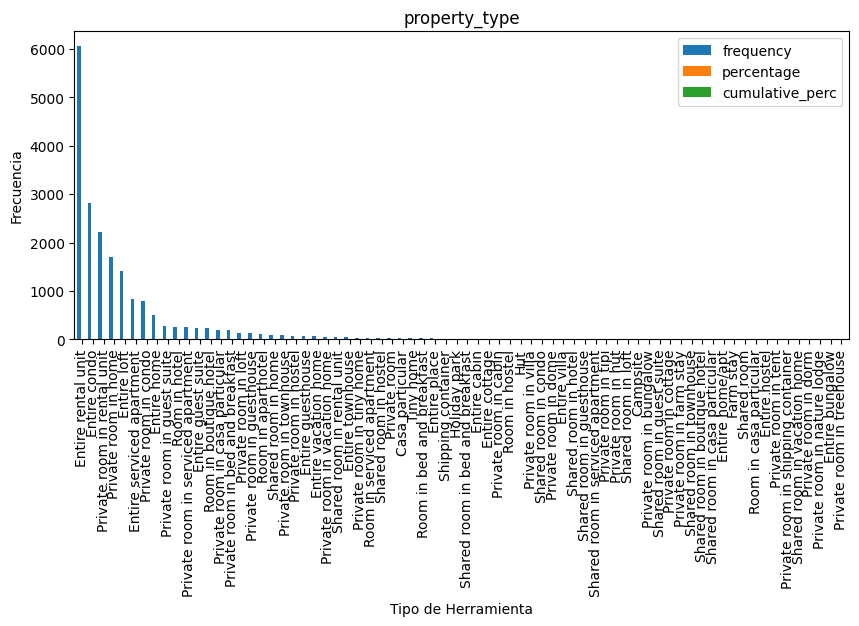

In [316]:
#Realizamos grafico de barras del dataframe filtrado
Filtro2_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('property_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

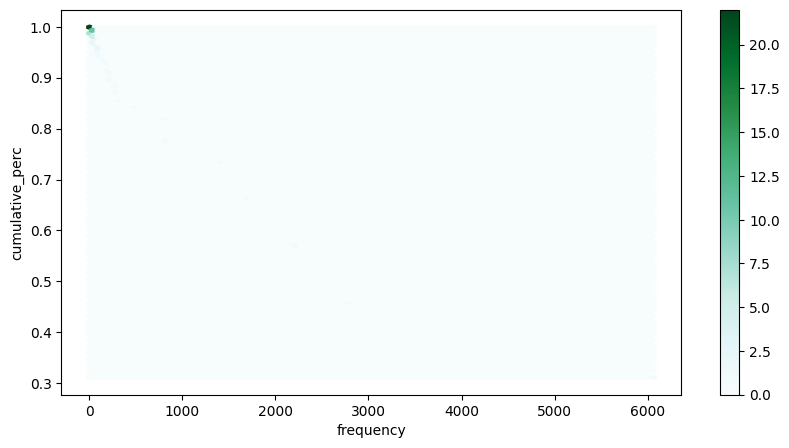

In [317]:
Filtro2_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

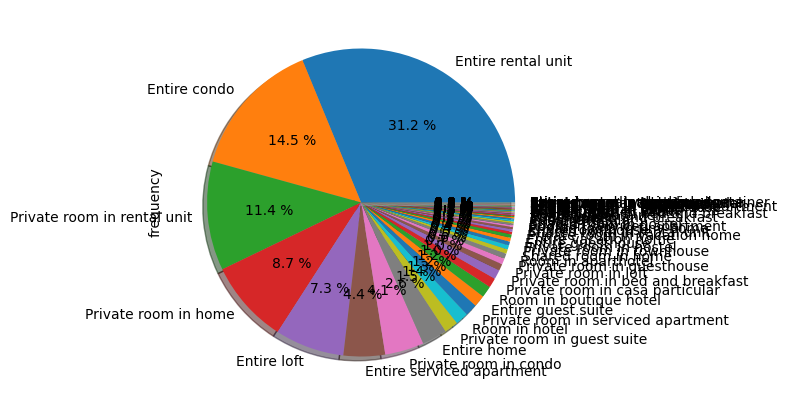

In [318]:
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='property_type'>

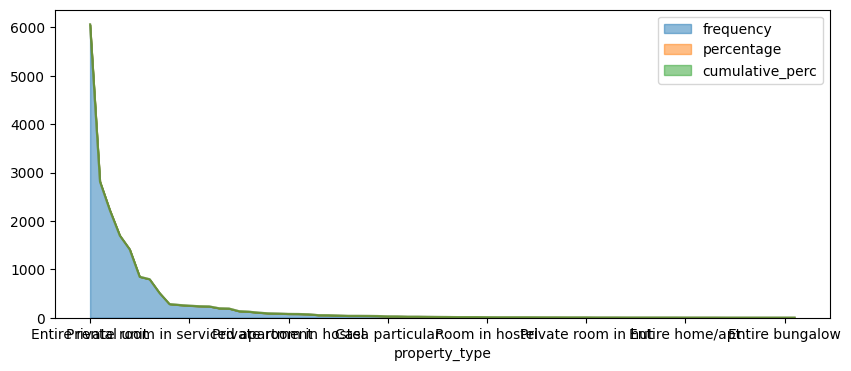

In [319]:
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

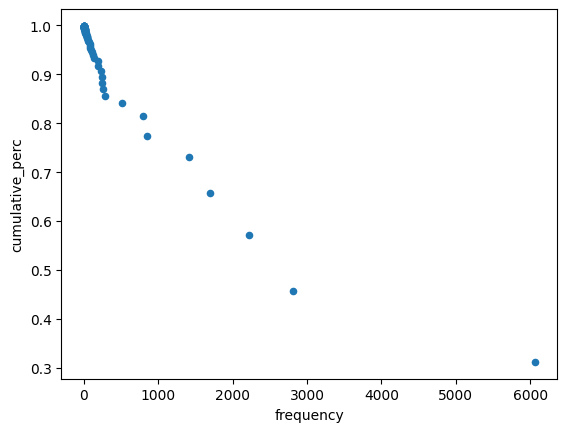

In [320]:
Filtro2_index.plot("frequency", "cumulative_perc", kind="scatter")

In [321]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(mexico2['host_response_time'])
table3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      13263    0.682534         0.682534
1                  --       2785    0.143320         0.825854
2  within a few hours       1540    0.079251         0.905105
3        within a day       1210    0.062268         0.967373
4  a few days or more        634    0.032627         1.000000

In [322]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3['frequency']>1]
Filtro3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      13263    0.682534         0.682534
1                  --       2785    0.143320         0.825854
2  within a few hours       1540    0.079251         0.905105
3        within a day       1210    0.062268         0.967373
4  a few days or more        634    0.032627         1.000000

In [323]:
#Ajusto el indice de mi dataframe
Filtro3_index= Filtro3.set_index('host_response_time')
Filtro3_index

frequency  percentage  cumulative_perc
host_response_time                                        
within an hour          13263    0.682534         0.682534
--                       2785    0.143320         0.825854
within a few hours       1540    0.079251         0.905105
within a day             1210    0.062268         0.967373
a few days or more        634    0.032627         1.000000

Text(0, 0.5, 'Frecuencia')

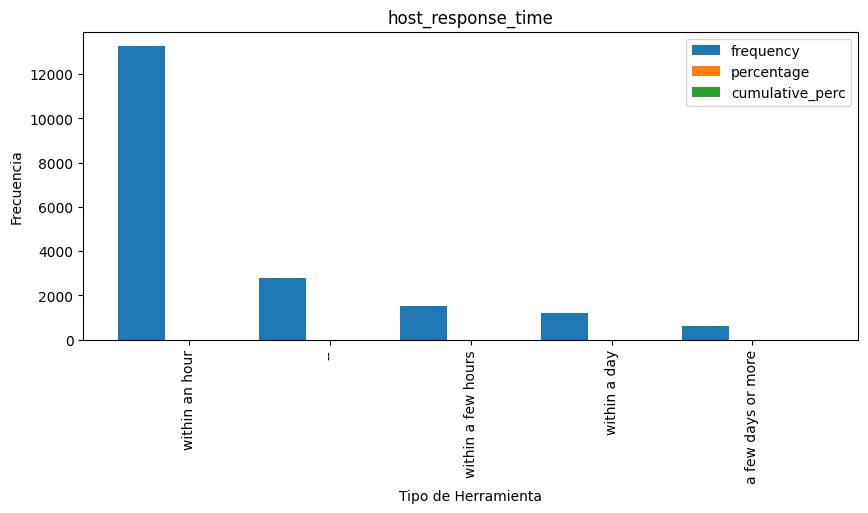

In [324]:
#Realizamos grafico de barras del dataframe filtrado
Filtro3_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_response_time')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

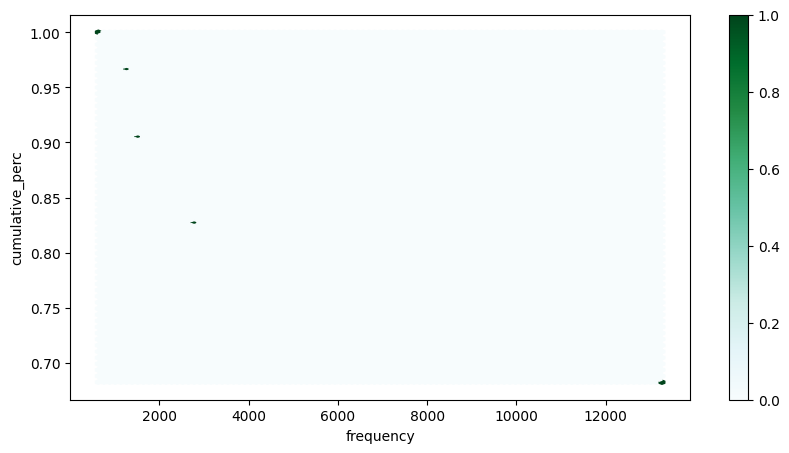

In [325]:
Filtro3_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

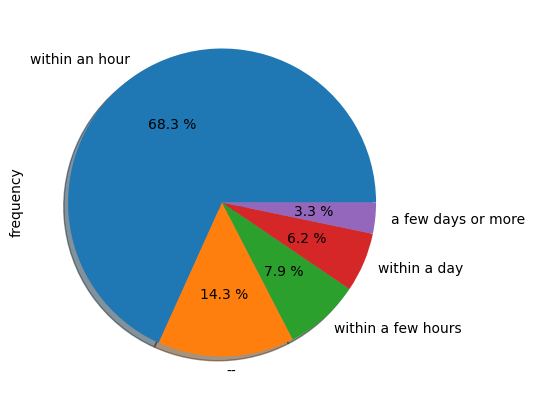

In [326]:
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_response_time'>

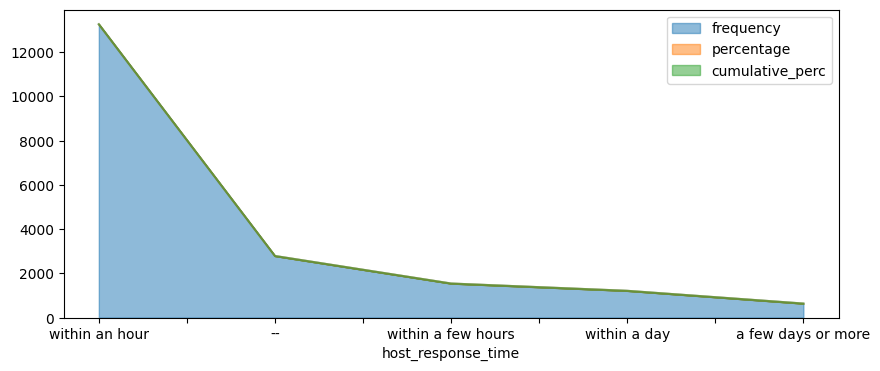

In [327]:
Filtro3_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

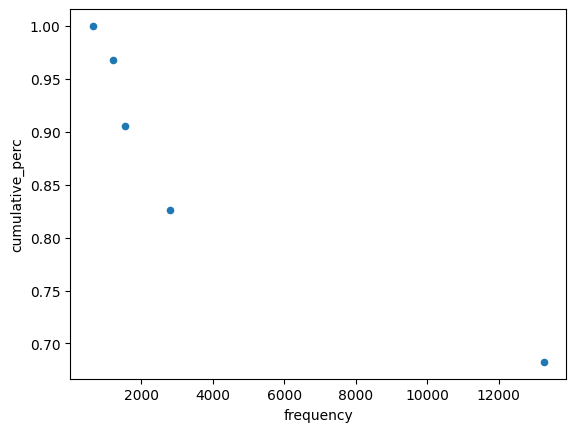

In [328]:
Filtro3_index.plot("frequency", "cumulative_perc", kind="scatter")

In [329]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(mexico2['host_is_superhost'])
table4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      11961    0.615531         0.615531
1                 t       7465    0.384160         0.999691
2                --          6    0.000309         1.000000

In [330]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>1]
Filtro4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      11961    0.615531         0.615531
1                 t       7465    0.384160         0.999691
2                --          6    0.000309         1.000000

In [331]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('host_is_superhost')
Filtro4_index

frequency  percentage  cumulative_perc
host_is_superhost                                        
f                      11961    0.615531         0.615531
t                       7465    0.384160         0.999691
--                         6    0.000309         1.000000

Text(0, 0.5, 'Frecuencia')

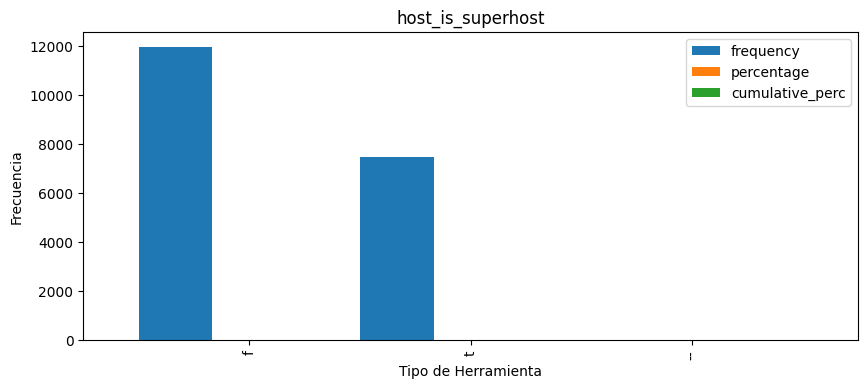

In [332]:
#Realizamos grafico de barras del dataframe filtrado
Filtro4_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_is_superhost')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

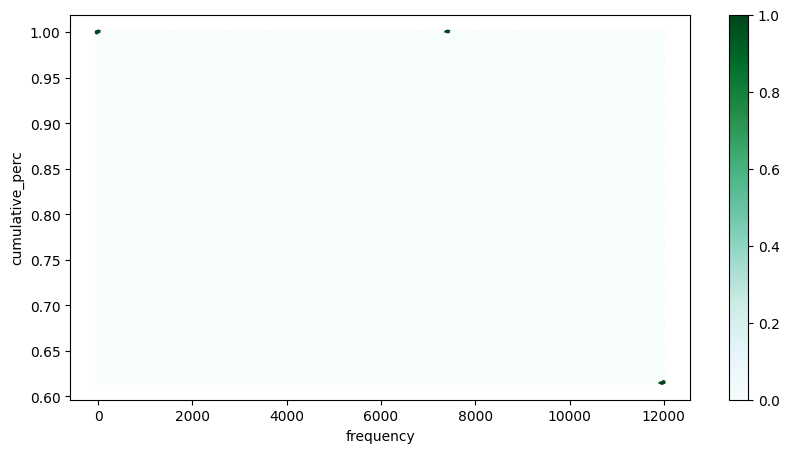

In [333]:
Filtro4_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

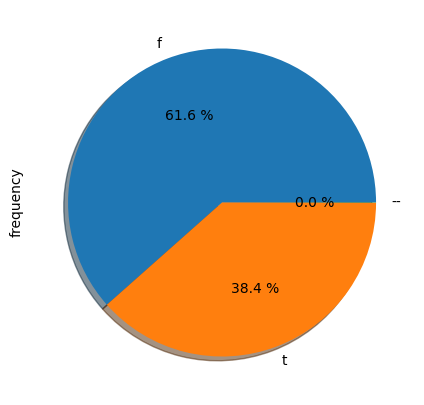

In [334]:
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_is_superhost'>

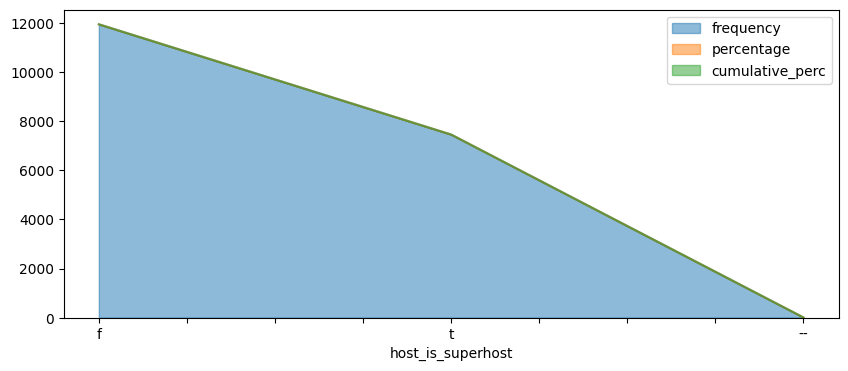

In [335]:
Filtro4_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

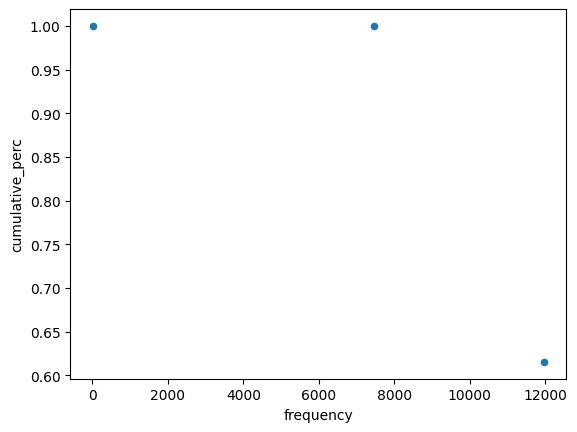

In [336]:
Filtro4_index.plot("frequency", "cumulative_perc", kind="scatter")

In [337]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(mexico2['room_type'])
table5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      12312    0.633594         0.633594
1     Private room       6736    0.346645         0.980239
2      Shared room        256    0.013174         0.993413
3       Hotel room        127    0.006536         0.999949
4               --          1    0.000051         1.000000

In [338]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>1]
Filtro5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      12312    0.633594         0.633594
1     Private room       6736    0.346645         0.980239
2      Shared room        256    0.013174         0.993413
3       Hotel room        127    0.006536         0.999949

In [339]:
#Ajusto el indice de mi dataframe
Filtro5_index= Filtro5.set_index('room_type')
Filtro5_index

frequency  percentage  cumulative_perc
room_type                                              
Entire home/apt      12312    0.633594         0.633594
Private room          6736    0.346645         0.980239
Shared room            256    0.013174         0.993413
Hotel room             127    0.006536         0.999949

Text(0, 0.5, 'Frecuencia')

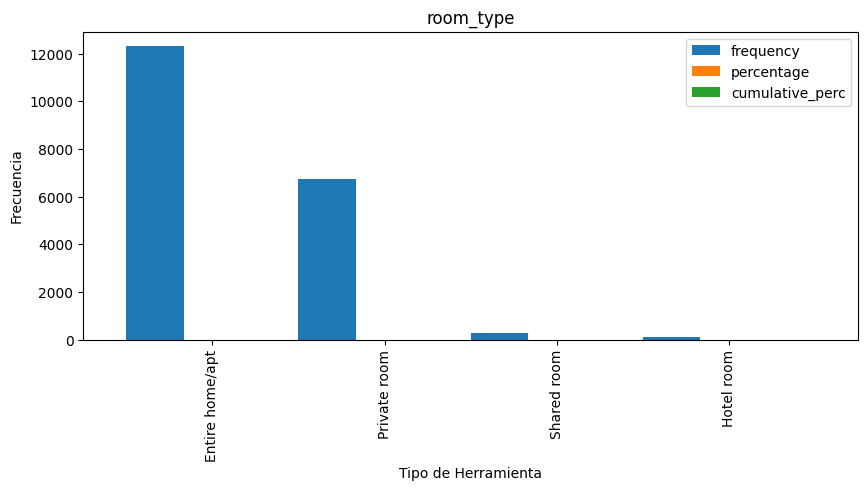

In [340]:
#Realizamos grafico de barras del dataframe filtrado
Filtro5_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('room_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

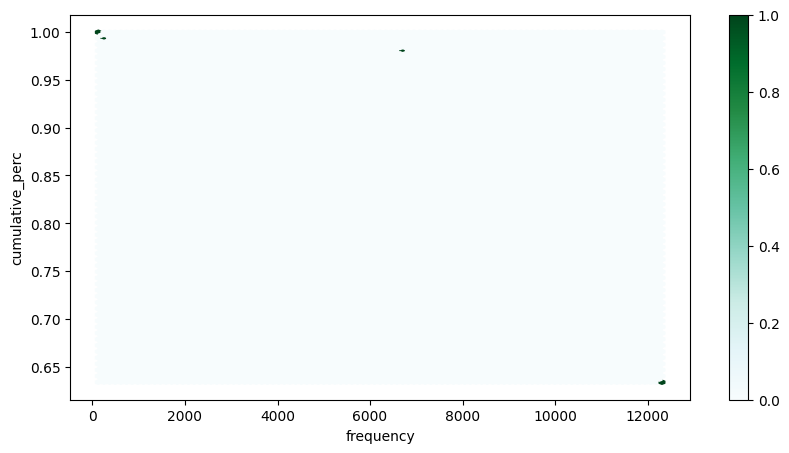

In [341]:
Filtro5_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

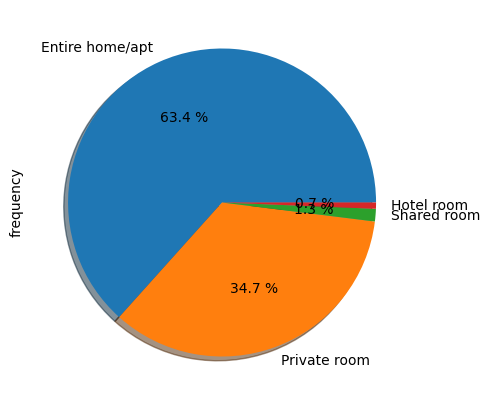

In [342]:
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='room_type'>

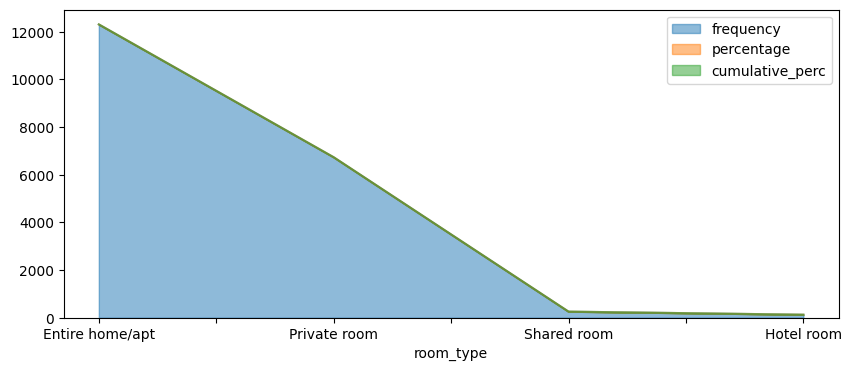

In [343]:
Filtro5_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

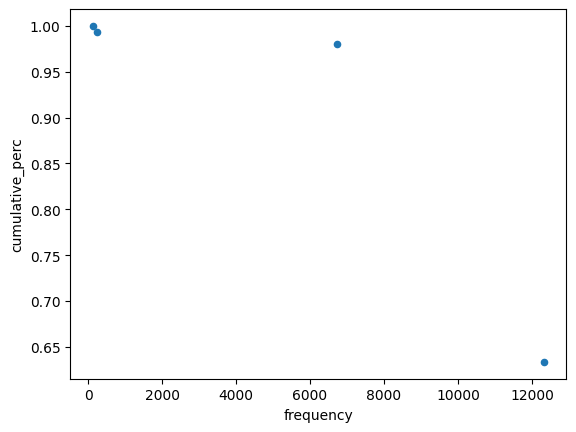

In [344]:
Filtro5_index.plot("frequency", "cumulative_perc", kind="scatter")

# **ESPAÑA**

In [345]:
#Verificamos información del DataFrame
espana.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18693 entries, 14551.0 to 8.33233e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   18693 non-null  object 
 1   scrape_id                                     18693 non-null  float64
 2   last_scraped                                  18693 non-null  object 
 3   source                                        18693 non-null  object 
 4   name                                          18693 non-null  object 
 5   description                                   18671 non-null  object 
 6   neighborhood_overview                         8161 non-null   object 
 7   picture_url                                   18693 non-null  object 
 8   host_id                                       18693 non-null  int64  
 9   host_url                                      1

In [346]:
#convertirmos la columna price en flotante y remplazamos $
espana.price= espana.price.replace({'\$':''}, regex = True)
espana.price= espana.price.replace({'\,':''}, regex = True)
espana['price'] = espana['price'].astype(float)

##**VALORES NULOS**

In [347]:
#Corroboramos valores nulos
espana.isnull().sum().sum()

158717

In [348]:
#Dividimos el dataframe en cuantitavios y cualitativos
cuanE = espana.select_dtypes(include=[np.float, np.int])
cualiE = espana.select_dtypes(include=[np.object])

<ipython-input-348-7bbb4a2ce4d3>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanE = espana.select_dtypes(include=[np.float, np.int])
<ipython-input-348-7bbb4a2ce4d3>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [349]:
#Checamos valores nulos por columna
cualiE.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  22
neighborhood_overview     10532
picture_url                   0
host_url                      0
host_name                   113
host_since                  113
host_location              5134
host_about                 7995
host_response_time         1991
host_response_rate         1991
host_acceptance_rate       1040
host_is_superhost            15
host_thumbnail_url          113
host_picture_url            113
host_neighbourhood        17506
host_verifications            0
host_has_profile_pic        113
host_identity_verified      113
neighbourhood             10532
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               15
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               4290
last_rev

In [350]:
#Rellenamos con "--" todos los datos nulos
cualiE= cualiE.fillna("--")

In [351]:
#Verificamos valores nulos
cualiE.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [352]:
#Checamos valores nulos por columna
cuanE.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                               113
host_total_listings_count                         113
neighbourhood_group_cleansed                    18693
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       18693
bedrooms                                          492
beds                                               90
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights                              1
maximum_maximum_nights                              1
minimum_nights_avg_ntm      

In [353]:
#Rellenamos con el promedio solo las columnas que presentan menos de 50 datos nulos
cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanE[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].mean(),1))

In [354]:
#Los demas datos al ser muchos los rellenamos con 0 para no afectar posteriores procesos, y se pueda entender que son datos que no se llenaron
cuanE= cuanE.fillna(0)

In [355]:
#Verificamos valores nulos
cuanE.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

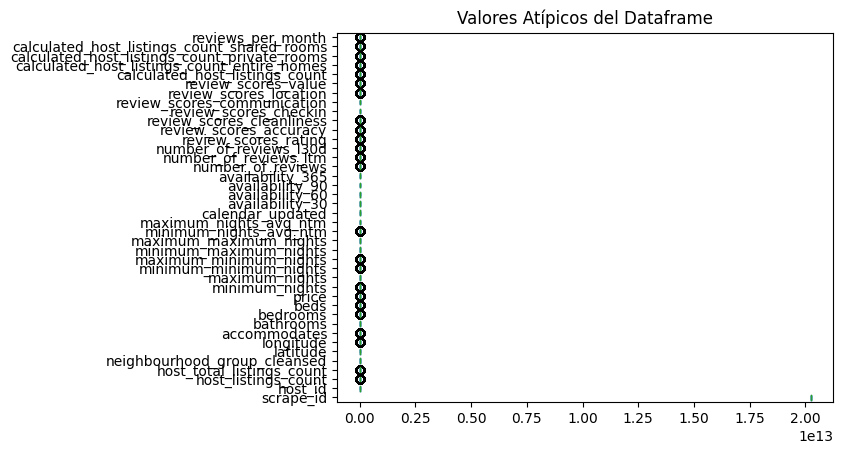

In [356]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanE.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [357]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
#Este metodo se utiliza ya que lo he encontrado mas efectivo que el metodo de desviacion estandar, siendo que este metodo si elimina todos los outliers
#Por otro lado me parece adecuado ya que al utilizar cuartiles en un dataframe tan grande y simetrico ayuda a que exista un mejor resultado de este metodo
y=cuanE

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.131472e+08
host_listings_count                             1.485000e+02
host_total_listings_count                       2.145000e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.288189e+01
longitude                                       3.624385e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        6.000000e+00
beds                                            9.500000e+00
price                                           3.850000e+02
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+0

In [358]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanE[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

scrape_id  host_id  host_listings_count  \
id                                                      
1.455100e+04        NaN      NaN                  NaN   
1.205757e+06        NaN      NaN                  NaN   
1.212820e+06        NaN      NaN                  NaN   
7.516380e+05        NaN      NaN                  NaN   
4.134200e+04        NaN      NaN                  NaN   
...                 ...      ...                  ...   
8.332110e+17        NaN      NaN                  NaN   
8.286580e+17        NaN      NaN                  NaN   
8.286610e+17        NaN      NaN                  NaN   
8.202780e+17        NaN      NaN                  NaN   
8.332330e+17        NaN      NaN                  NaN   

              host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                      
1.455100e+04                        NaN                           NaN   
1.205757e+06                        NaN                           NaN   
1.212820e+06                        NaN                           NaN   
7.516380e+05                        NaN                           NaN   
4.134200e+04                        NaN                           NaN   
...                                 ...                           ...   
8.332110e+17                        NaN                           NaN   
8.286580e+17                        NaN                           NaN   
8.286610e+17                        NaN                           NaN   
8.202780e+17                        NaN                           NaN   
8.332330e+17                        NaN                           NaN   

              latitude  longitude  accommodates  bathrooms  bedrooms  ...  \
id                                                                    ...   
1.455100e+04       NaN        NaN           NaN        NaN       NaN  ...   
1.205757e+06       NaN        NaN           NaN        NaN       NaN  ...   
1.212820e+06       NaN        NaN           NaN        NaN       NaN  ...   
7.516380e+05       NaN        NaN           NaN        NaN       NaN  ...   
4.134200e+04       NaN        NaN           NaN        NaN       NaN  ...   
...                ...        ...           ...        ...       ...  ...   
8.332110e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.286580e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.286610e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.202780e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.332330e+17       NaN        NaN           NaN        NaN       NaN  ...   

              review_scores_cleanliness  review_scores_checkin  \
id                                                               
1.455100e+04                        NaN                    NaN   
1.205757e+06                        NaN                    NaN   
1.212820e+06                        NaN                    NaN   
7.516380e+05                        NaN                    NaN   
4.134200e+04                        NaN                    NaN   
...                                 ...                    ...   
8.332110e+17                        0.0                    NaN   
8.286580e+17                        0.0                    NaN   
8.286610e+17                        0.0                    NaN   
8.202780e+17                        0.0                    NaN   
8.332330e+17                        0.0                    NaN   

              review_scores_communication  review_scores_location  \
id                                                                  
1.455100e+04                          NaN                     NaN   
1.205757e+06                          NaN                     NaN   
1.212820e+06                          NaN                     NaN   
7.516380e+05                          NaN                     NaN   
4.134200e+04                          NaN      

In [359]:
#Obtenemos datos limpios del Dataframe
cuanE= cuanE[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanE

scrape_id    host_id  host_listings_count  \
id                                                           
1.455100e+04  2.023030e+13      57237                  1.0   
1.205757e+06  2.023030e+13    6586355                  1.0   
1.212820e+06  2.023030e+13    6620645                  2.0   
7.516380e+05  2.023030e+13    3680160                  6.0   
4.134200e+04  2.023030e+13     180072                  2.0   
...                    ...        ...                  ...   
8.332110e+17  2.023030e+13   24626866                 14.0   
8.286580e+17  2.023030e+13  354235559                  8.0   
8.286610e+17  2.023030e+13  354235559                  8.0   
8.202780e+17  2.023030e+13  158289157                  1.0   
8.332330e+17  2.023030e+13  369064535                  3.0   

              host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                      
1.455100e+04                        5.0                           0.0   
1.205757e+06                        1.0                           0.0   
1.212820e+06                        3.0                           0.0   
7.516380e+05                        6.0                           0.0   
4.134200e+04                        3.0                           0.0   
...                                 ...                           ...   
8.332110e+17                       31.0                           0.0   
8.286580e+17                        8.0                           0.0   
8.286610e+17                        8.0                           0.0   
8.202780e+17                        1.0                           0.0   
8.332330e+17                        3.0                           0.0   

               latitude  longitude  accommodates  bathrooms  bedrooms  ...  \
id                                                                     ...   
1.455100e+04  41.996500   2.836460           2.0        0.0       1.0  ...   
1.205757e+06  41.793040   2.774120           2.0        0.0       1.0  ...   
1.212820e+06  42.112840   3.166700           4.0        0.0       1.0  ...   
7.516380e+05  42.369580   2.980300           2.0        0.0       1.0  ...   
4.134200e+04  42.346550   3.204630           4.0        0.0       1.0  ...   
...                 ...        ...           ...        ...       ...  ...   
8.332110e+17  41.704149   2.864513           6.0        0.0       2.0  ...   
8.286580e+17  42.247053   3.197873           4.0        0.0       2.0  ...   
8.286610e+17  42.247472   3.197150           5.0        0.0       3.0  ...   
8.202780e+17  42.253723   3.184175           2.0        0.0       1.0  ...   
8.332330e+17  42.265592   3.165072           4.0        0.0       2.0  ...   

              review_scores_cleanliness  review_scores_checkin  \
id                                                               
1.455100e+04                       4.94                   4.89   
1.205757e+06                       4.85                   4.85   
1.212820e+06                       4.31                   4.81   
7.516380e+05                       4.50                   4.86   
4.134200e+04                       4.82                   4.73   
...                                 ...                    ...   
8.332110e+17                        NaN                   0.00   
8.286580e+17                        NaN                   0.00   
8.286610e+17                        NaN                   0.00   
8.202780e+17                        NaN                   0.00   
8.332330e+17                        NaN                   0.00   

              review_scores_communication  review_scores_location  \
id                                                                  
1.455100e+04                         4.91                    4.63   
1.205757e+06                         4.91                    4.69   
1.212820e+06                         4.76                    4.74   
7.516380e+05                         5.00

In [360]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanE.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             1804
host_total_listings_count                       2295
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                        895
accommodates                                    1541
bathrooms                                          0
bedrooms                                         279
beds                                             545
price                                           1821
minimum_nights                                   434
maximum_nights                                     0
minimum_minimum_nights                           417
maximum_minimum_nights                           972
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                        

In [361]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
cuanE=cuanE.fillna(round(cuanE.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanE.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [362]:
#Realizamos un merge de las dos dataframes limpias
espana2=pd.merge(cualiE,cuanE , left_index=True, right_index=True, how='outer')
espana2.head()

listing_url last_scraped           source  \
id                                                                          
14551.0  https://www.airbnb.com/rooms/14551   31/03/2023      city scrape   
41342.0  https://www.airbnb.com/rooms/41342   01/04/2023  previous scrape   
45400.0  https://www.airbnb.com/rooms/45400   01/04/2023      city scrape   
48764.0  https://www.airbnb.com/rooms/48764   31/03/2023      city scrape   
93343.0  https://www.airbnb.com/rooms/93343   01/04/2023      city scrape   

                                                      name  \
id                                                           
14551.0           Cozy & Colorful by Nature (Private Room)   
41342.0                  Beachfront Tamariua (Costa Brava)   
45400.0                 Begur - Loft - Costa Brava - SPAIN   
48764.0                18th C Stone House near Costa Brava   
93343.0  Alquiler de casa en La Costa Brava cerca de playa   

                                               description  \
id                                                           
14551.0  Up in the hill of MontjuÃ¯c (a mountain overlo...   
41342.0  A little paradise by the sea. Apartment 2/4 ad...   
45400.0  <b>The space</b><br />Flat / Apartment. New. P...   
48764.0  Casa Fluvia is a charming stone village house ...   
93343.0  Siguiendo con nuestra linea de alojamientos co...   

                                     neighborhood_overview  \
id                                                           
14551.0  MontjuÃ¯c is most likely the best neighborhood...   
41342.0  Apartment located outside the town on a small ...   
45400.0                                                 --   
48764.0  Torroella de FluviÃ¡ is a small peaceful rural...   
93343.0  Localizada a:<br />Playa : 700 m<br />Supermer...   

                                               picture_url  \
id                                                           
14551.0  https://a0.muscache.com/pictures/16209908/f1fe...   
41342.0  https://a0.muscache.com/pictures/70414801/59d4...   
45400.0  https://a0.muscache.com/pictures/2206667/ea3bd...   
48764.0  https://a0.muscache.com/pictures/19824290/9c7a...   
93343.0  https://a0.muscache.com/pictures/6656368/7038d...   

                                         host_url     host_name  host_since  \
id                                                                            
14551.0   https://www.airbnb.com/users/show/57237           Mun  24/11/2009   
41342.0  https://www.airbnb.com/users/show/180072        Marisa  25/07/2010   
45400.0  https://www.airbnb.com/users/show/201228         Oscar  14/08/2010   
48764.0  https://www.airbnb.com/users/show/220145  Dick And Ann  01/09/2010   
93343.0  https://www.airbnb.com/users/show/477826     Francisco  01/04/2011   

         ... review_scores_cleanliness review_scores_checkin  \
id       ...                                                   
14551.0  ...                      4.94                  4.89   
41342.0  ...                      4.82                  4.73   
45400.0  ...                      4.73                  4.93   
48764.0  ...                      4.88                  4.97   
93343.0  ...                      4.50                  0.00   

        review_scores_communication review_scores_location  \
id                                                           
14551.0                        4.91                   4.63   
41342.0                        4.73                   4.91   
45400.0                        4.94                   4.89   
48764.0                        4.97                   4.70   
93343.0                        0.00                   4.70   

        review_scores_value calculated_host_listings_count  \
id                                                           
14551.0                4.74                            1.0   
41342.0                4.36                            1.0   
45400.0                4.70                            1.0   
4876

In [363]:
#Verificamos datos nulos
espana2.isnull().sum().sum()

0

##**FILTROS**

In [364]:
espana2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maxi

In [365]:
filtro1E= espana2[espana2['host_acceptance_rate'] > '50%']
filtro1E['host_acceptance_rate']

id
1.455100e+04    90%
4.876400e+04    80%
1.067040e+05    65%
1.219620e+05    65%
1.222730e+05    65%
               ... 
8.286610e+17    96%
8.331220e+17    52%
8.332020e+17    98%
8.332110e+17    90%
8.332330e+17    96%
Name: host_acceptance_rate, Length: 10182, dtype: object

In [366]:
filtro2E= espana2[espana2['host_is_superhost']== "t"]
filtro2E['host_is_superhost']

id
1.455100e+04    t
4.540000e+04    t
1.067040e+05    t
1.219620e+05    t
1.222730e+05    t
               ..
8.266070e+17    t
8.266230e+17    t
8.269070e+17    t
8.286580e+17    t
8.286610e+17    t
Name: host_is_superhost, Length: 3082, dtype: object

In [367]:
filtro3E= espana2[espana2['host_identity_verified']== "f"]
filtro3E['host_identity_verified']

id
1.792200e+05    f
2.541000e+05    f
2.730370e+05    f
2.965630e+05    f
3.590560e+05    f
               ..
8.077040e+17    f
8.194830e+17    f
8.208140e+17    f
8.209610e+17    f
8.223700e+17    f
Name: host_identity_verified, Length: 2302, dtype: object

In [368]:
espana2['property_type'].unique()

array(['Private room in condo', 'Entire rental unit', 'Entire home',
       'Entire villa', 'Farm stay', 'Entire townhouse', 'Entire loft',
       'Private room in home', 'Entire condo',
       'Private room in guest suite', 'Private room in townhouse',
       'Entire cottage', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Entire guest suite',
       'Private room in rental unit', 'Entire chalet', 'Castle',
       'Private room in loft', 'Entire cabin',
       'Private room in farm stay', 'Hut', 'Private room in cottage',
       'Private room in villa', 'Barn', 'Private room',
       'Entire vacation home', 'Private room in chalet',
       'Shared room in home', 'Entire bungalow',
       'Entire serviced apartment', 'Private room in bungalow',
       'Casa particular', 'Private room in guesthouse',
       'Entire bed and breakfast', 'Tiny home',
       'Private room in serviced apartment',
       'Private room in casa particular', 'Earthen home',
       'Room in ser

In [369]:
filtro4E= espana2[(espana2['property_type']== 'Private room')|(espana2['property_type']=='Room in hotel')]
filtro4E['property_type']

id
3.054347e+06     Private room
1.461311e+07     Private room
1.711768e+07     Private room
1.901004e+07    Room in hotel
1.901004e+07    Room in hotel
                    ...      
8.157460e+17    Room in hotel
8.179910e+17    Room in hotel
8.214490e+17    Room in hotel
8.214840e+17    Room in hotel
8.222360e+17    Room in hotel
Name: property_type, Length: 199, dtype: object

In [370]:
espana2['bathrooms']

id
1.455100e+04    0.0
4.134200e+04    0.0
4.540000e+04    0.0
4.876400e+04    0.0
9.334300e+04    0.0
               ... 
8.331220e+17    0.0
8.331510e+17    0.0
8.332020e+17    0.0
8.332110e+17    0.0
8.332330e+17    0.0
Name: bathrooms, Length: 20775, dtype: float64

In [371]:
filtro5E= espana2[espana2['bathrooms']>1]
filtro5E

Empty DataFrame
Columns: [listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, property_type, room_type, bathrooms_text, amenities, has_availability, calendar_last_scraped, first_review, last_review, license, instant_bookable, scrape_id, host_id, host_listings_count, host_total_listings_count, neighbourhood_group_cleansed, latitude, longitude, accommodates, bathrooms, bedrooms, beds, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 74 columns]

In [372]:
filtro6E= espana2[(espana2['price'] > 10000) & (espana2["property_type"] == "Entire home")]
filtro6E[['price', 'property_type']]

Empty DataFrame
Columns: [price, property_type]
Index: []

In [373]:
filtro7E= espana2[espana2['review_scores_cleanliness']>4.5]
filtro7E['review_scores_cleanliness']

id
1.455100e+04    4.94
4.134200e+04    4.82
4.540000e+04    4.73
4.876400e+04    4.88
1.015800e+05    4.73
                ... 
8.251120e+17    5.00
8.258600e+17    5.00
8.258890e+17    5.00
8.261090e+17    5.00
8.266380e+17    5.00
Name: review_scores_cleanliness, Length: 9617, dtype: float64

In [374]:
filtro8E= espana2[espana2['review_scores_value']>4.9]
filtro8E['review_scores_value']

id
4.382430e+05    4.93
6.843860e+05    4.92
7.743710e+05    4.92
8.091360e+05    5.00
9.343500e+05    5.00
                ... 
8.251120e+17    5.00
8.258890e+17    5.00
8.261090e+17    5.00
8.266380e+17    5.00
8.280870e+17    5.00
Name: review_scores_value, Length: 2677, dtype: float64

In [375]:
filtro9E= espana2[espana2['availability_365']<100]
filtro9E['availability_365']

id
4.134200e+04     0
4.876400e+04    28
9.334300e+04    84
1.688320e+05    47
1.792200e+05     0
                ..
8.274170e+17    62
8.276300e+17    96
8.279140e+17     0
8.279830e+17    50
8.332020e+17    62
Name: availability_365, Length: 5180, dtype: int64

In [376]:
filtro10E= espana2[espana2['host_response_time']== 'within an hour']
filtro10E['host_response_time']

id
1.455100e+04    within an hour
4.540000e+04    within an hour
1.015800e+05    within an hour
1.216660e+05    within an hour
1.223710e+05    within an hour
                     ...      
8.286580e+17    within an hour
8.286610e+17    within an hour
8.331510e+17    within an hour
8.332020e+17    within an hour
8.332330e+17    within an hour
Name: host_response_time, Length: 12618, dtype: object

##**TABLAS DE FRECUENCIA**

In [377]:
##Obtengo un análisis univariado de las variables categóricas
freq_tbl(espana2)

                                           listing_url  frequency  percentage  \
0      https://www.airbnb.com/rooms/811375209925117773         19    0.000915   
1      https://www.airbnb.com/rooms/811375079415863857         19    0.000915   
2      https://www.airbnb.com/rooms/811374501206598444         19    0.000915   
3      https://www.airbnb.com/rooms/811374512259496418         19    0.000915   
4      https://www.airbnb.com/rooms/811374615087867103         19    0.000915   
...                                                ...        ...         ...   
18688            https://www.airbnb.com/rooms/24842529          1    0.000048   
18689            https://www.airbnb.com/rooms/24841381          1    0.000048   
18690            https://www.airbnb.com/rooms/24841118          1    0.000048   
18691            https://www.airbnb.com/rooms/24839231          1    0.000048   
18692  https://www.airbnb.com/rooms/833232870880503395          1    0.000048   

       cumulative_perc  
0 

In [378]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(espana2['source'])
table1

source  frequency  percentage  cumulative_perc
0      city scrape      19472     0.93728          0.93728
1  previous scrape       1303     0.06272          1.00000

In [379]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]
Filtro1

source  frequency  percentage  cumulative_perc
0      city scrape      19472     0.93728          0.93728
1  previous scrape       1303     0.06272          1.00000

In [380]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('source')
Filtro1_index

frequency  percentage  cumulative_perc
source                                                 
city scrape          19472     0.93728          0.93728
previous scrape       1303     0.06272          1.00000

Text(0, 0.5, 'Frecuencia')

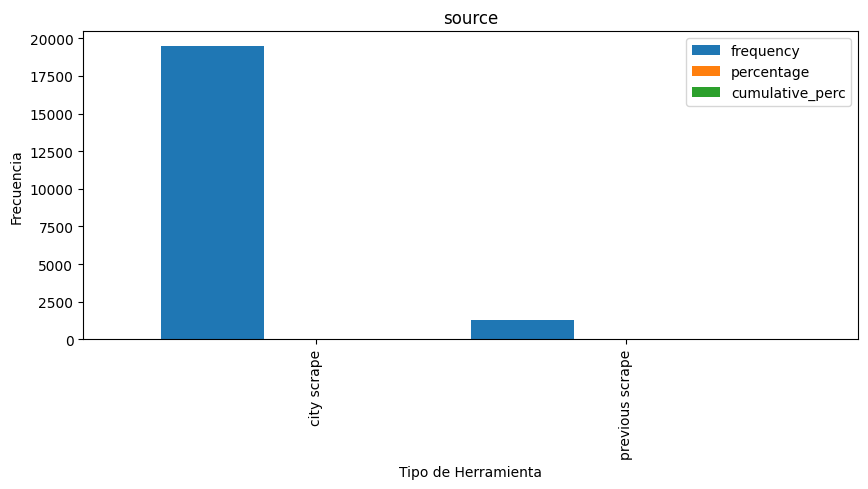

In [381]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('source')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

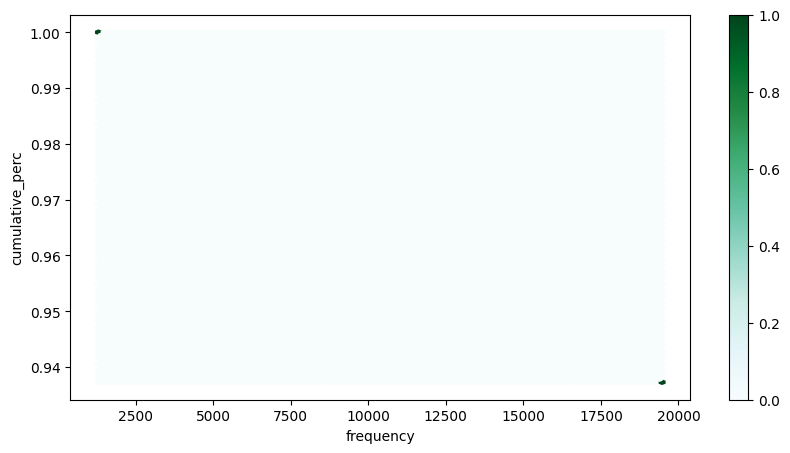

In [382]:
Filtro1_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

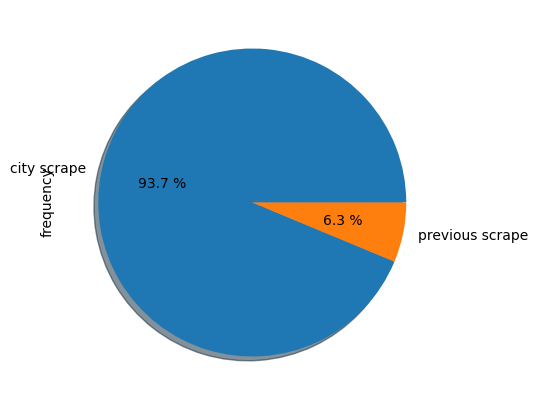

In [383]:
Filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='source'>

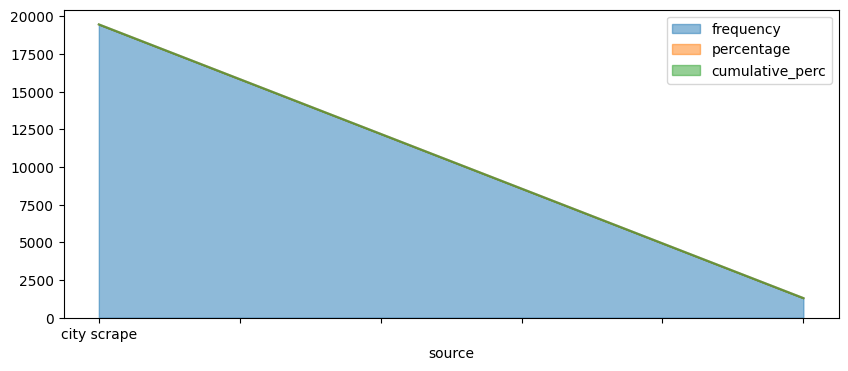

In [384]:
Filtro1_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

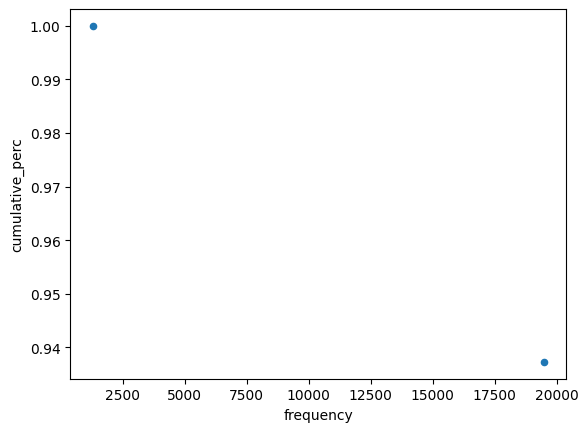

In [385]:
Filtro1_index.plot("frequency", "cumulative_perc", kind="scatter")

In [386]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(espana2['property_type'])
table2

property_type  frequency  percentage  cumulative_perc
0            Entire rental unit      10101    0.486209         0.486209
1                   Entire home       3946    0.189940         0.676149
2                  Entire villa       1832    0.088183         0.764332
3                  Entire condo       1399    0.067341         0.831673
4                Entire cottage        565    0.027196         0.858869
..                          ...        ...         ...              ...
68          Private room in hut          1    0.000048         0.999807
69     Entire bed and breakfast          1    0.000048         0.999856
70        Private room in cabin          1    0.000048         0.999904
71  Shared room in nature lodge          1    0.000048         0.999952
72         Private room in tent          1    0.000048         1.000000

[73 rows x 4 columns]

In [387]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>1]
Filtro2

property_type  frequency  percentage  cumulative_perc
0         Entire rental unit      10101    0.486209         0.486209
1                Entire home       3946    0.189940         0.676149
2               Entire villa       1832    0.088183         0.764332
3               Entire condo       1399    0.067341         0.831673
4             Entire cottage        565    0.027196         0.858869
..                       ...        ...         ...              ...
58      Private room in loft          2    0.000096         0.999134
59  Private room in windmill          2    0.000096         0.999230
60      Private room in boat          2    0.000096         0.999326
61  Private room in bungalow          2    0.000096         0.999422
62      Private room in barn          2    0.000096         0.999519

[63 rows x 4 columns]

In [388]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('property_type')
Filtro2_index

frequency  percentage  cumulative_perc
property_type                                                   
Entire rental unit            10101    0.486209         0.486209
Entire home                    3946    0.189940         0.676149
Entire villa                   1832    0.088183         0.764332
Entire condo                   1399    0.067341         0.831673
Entire cottage                  565    0.027196         0.858869
...                             ...         ...              ...
Private room in loft              2    0.000096         0.999134
Private room in windmill          2    0.000096         0.999230
Private room in boat              2    0.000096         0.999326
Private room in bungalow          2    0.000096         0.999422
Private room in barn              2    0.000096         0.999519

[63 rows x 3 columns]

Text(0, 0.5, 'Frecuencia')

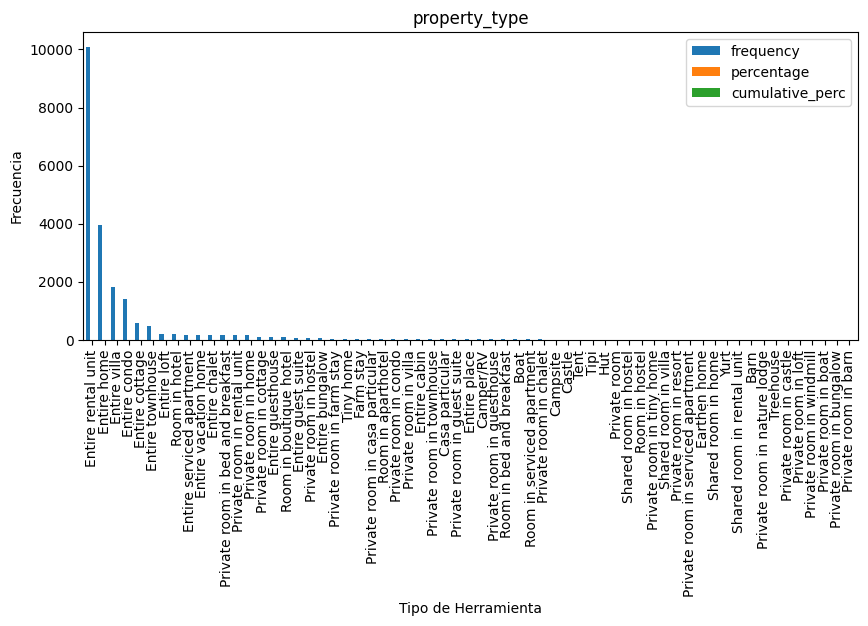

In [389]:
#Realizamos grafico de barras del dataframe filtrado
Filtro2_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('property_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

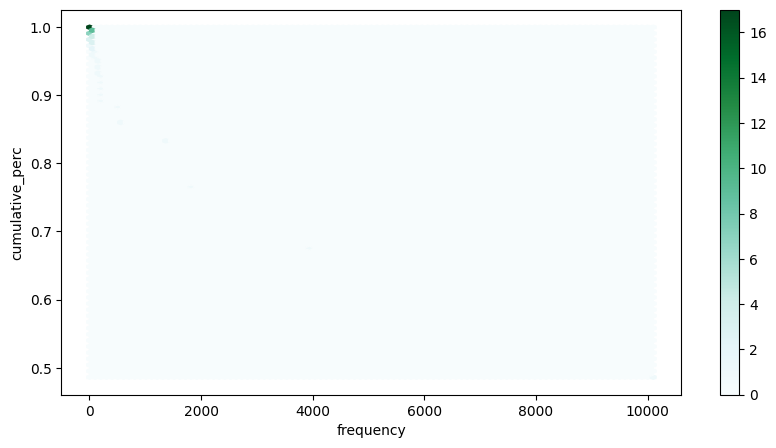

In [390]:
Filtro2_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

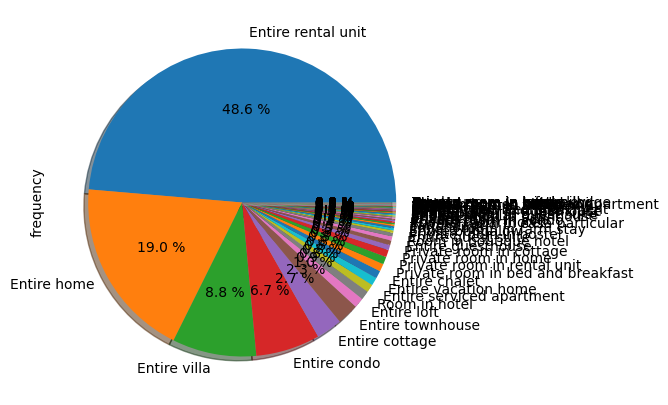

In [391]:
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='property_type'>

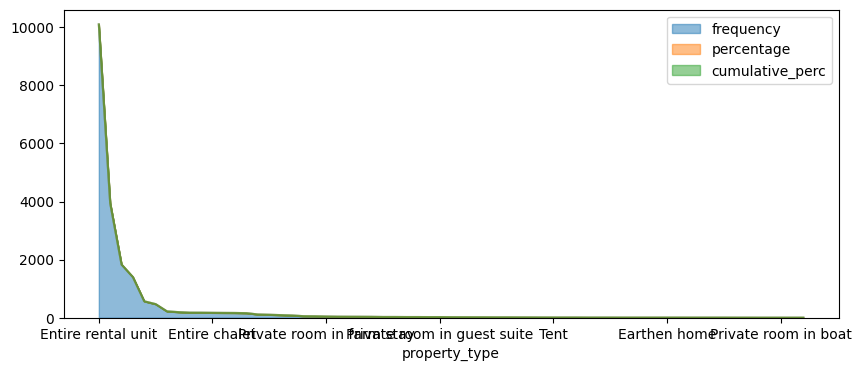

In [392]:
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

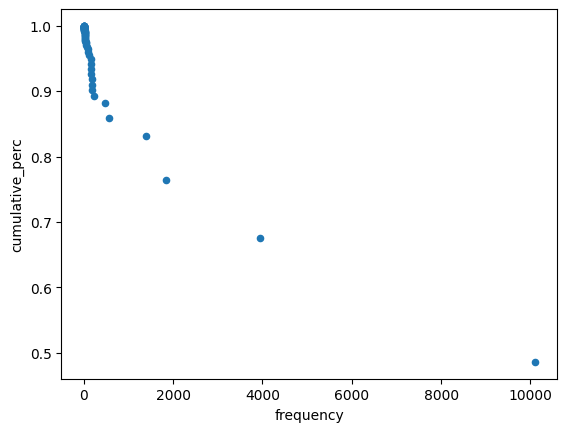

In [393]:
Filtro2_index.plot("frequency", "cumulative_perc", kind="scatter")

In [394]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(espana2['host_response_time'])
table3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      12618    0.607365         0.607365
1                  --       2769    0.133285         0.740650
2  within a few hours       2681    0.129049         0.869699
3        within a day       2298    0.110614         0.980313
4  a few days or more        409    0.019687         1.000000

In [395]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3['frequency']>1]
Filtro3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      12618    0.607365         0.607365
1                  --       2769    0.133285         0.740650
2  within a few hours       2681    0.129049         0.869699
3        within a day       2298    0.110614         0.980313
4  a few days or more        409    0.019687         1.000000

In [396]:
#Ajusto el indice de mi dataframe
Filtro3_index= Filtro3.set_index('host_response_time')
Filtro3_index

frequency  percentage  cumulative_perc
host_response_time                                        
within an hour          12618    0.607365         0.607365
--                       2769    0.133285         0.740650
within a few hours       2681    0.129049         0.869699
within a day             2298    0.110614         0.980313
a few days or more        409    0.019687         1.000000

Text(0, 0.5, 'Frecuencia')

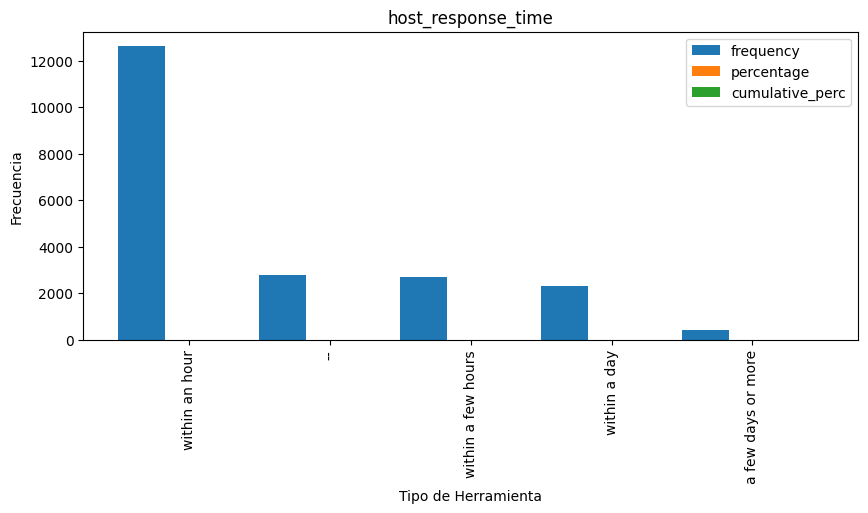

In [397]:
#Realizamos grafico de barras del dataframe filtrado
Filtro3_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_response_time')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

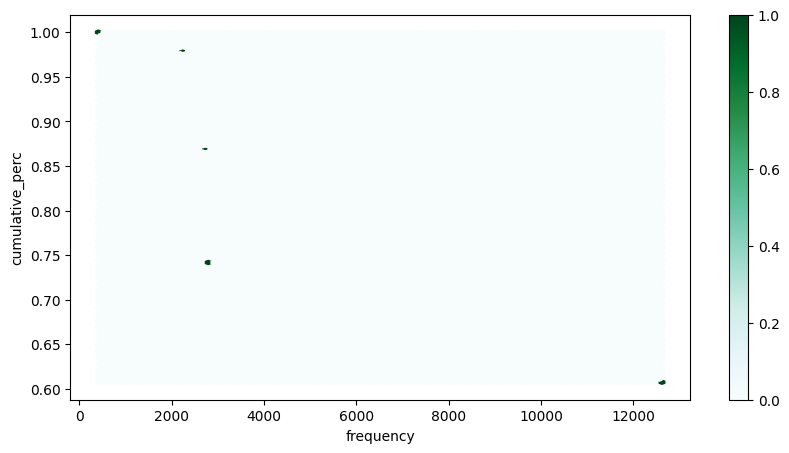

In [398]:
Filtro3_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

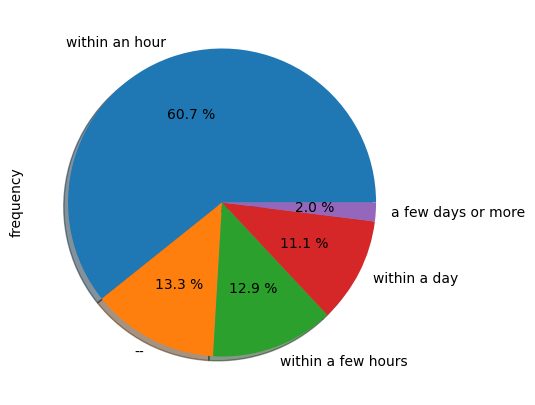

In [399]:
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_response_time'>

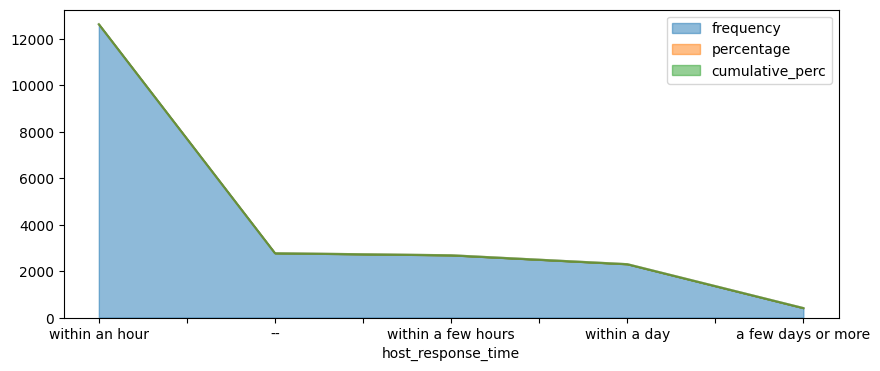

In [400]:
Filtro3_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

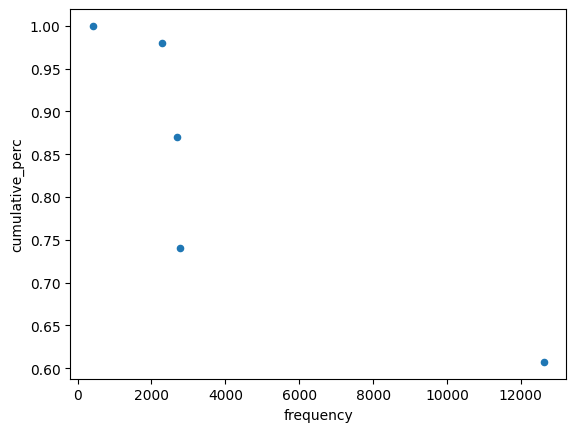

In [401]:
Filtro3_index.plot("frequency", "cumulative_perc", kind="scatter")

In [402]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(espana2['host_is_superhost'])
table4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      17678    0.850927         0.850927
1                 t       3082    0.148351         0.999278
2                --         15    0.000722         1.000000

In [403]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>1]
Filtro4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      17678    0.850927         0.850927
1                 t       3082    0.148351         0.999278
2                --         15    0.000722         1.000000

In [404]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('host_is_superhost')
Filtro4_index

frequency  percentage  cumulative_perc
host_is_superhost                                        
f                      17678    0.850927         0.850927
t                       3082    0.148351         0.999278
--                        15    0.000722         1.000000

Text(0, 0.5, 'Frecuencia')

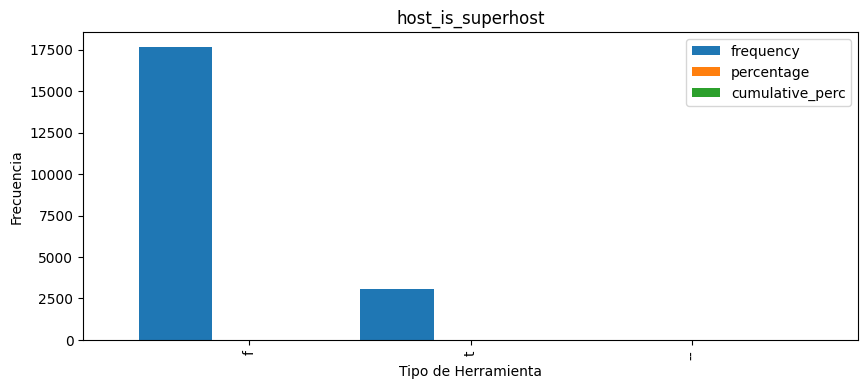

In [405]:
#Realizamos grafico de barras del dataframe filtrado
Filtro4_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_is_superhost')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

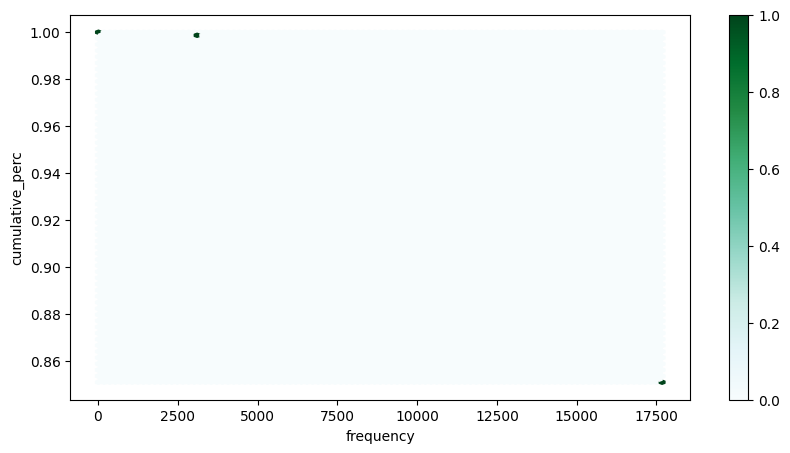

In [406]:
Filtro4_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

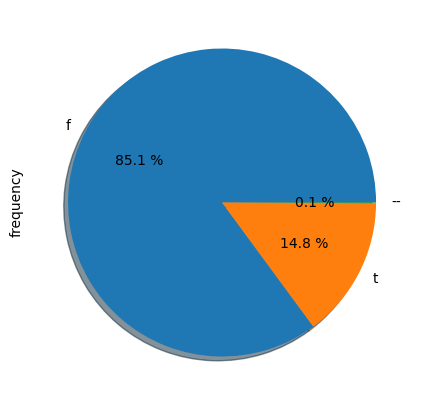

In [407]:
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_is_superhost'>

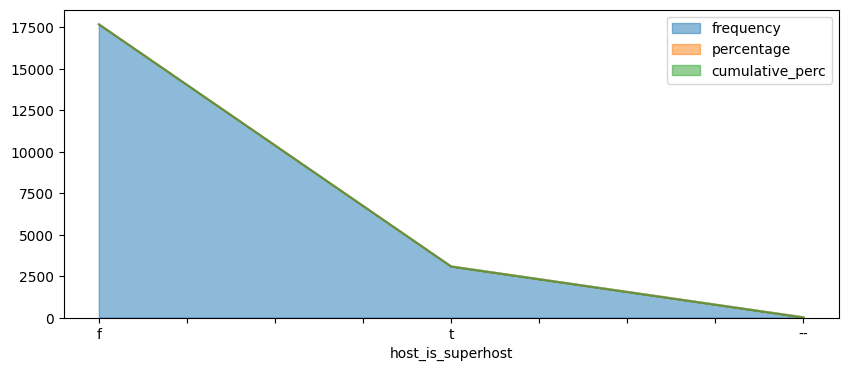

In [408]:
Filtro4_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

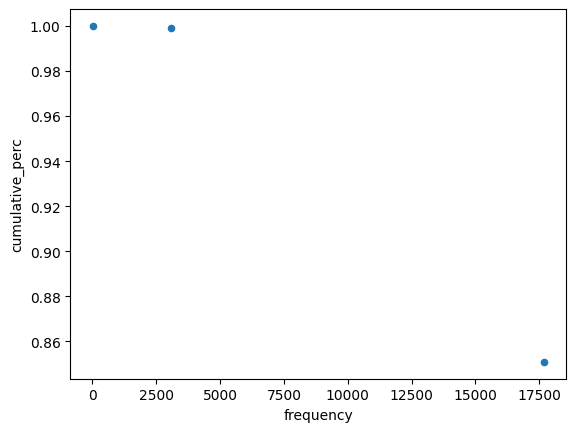

In [409]:
Filtro4_index.plot("frequency", "cumulative_perc", kind="scatter")

In [410]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(espana2['room_type'])
table5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      19505    0.938869         0.938869
1     Private room       1199    0.057714         0.996582
2       Hotel room         50    0.002407         0.998989
3      Shared room         21    0.001011         1.000000

In [411]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>1]
Filtro5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      19505    0.938869         0.938869
1     Private room       1199    0.057714         0.996582
2       Hotel room         50    0.002407         0.998989
3      Shared room         21    0.001011         1.000000

In [412]:
#Ajusto el indice de mi dataframe
Filtro5_index= Filtro5.set_index('room_type')
Filtro5_index

frequency  percentage  cumulative_perc
room_type                                              
Entire home/apt      19505    0.938869         0.938869
Private room          1199    0.057714         0.996582
Hotel room              50    0.002407         0.998989
Shared room             21    0.001011         1.000000

Text(0, 0.5, 'Frecuencia')

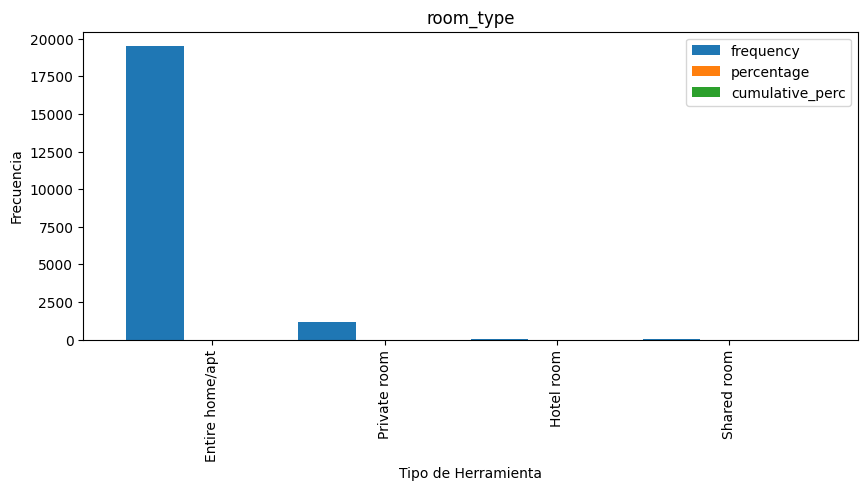

In [413]:
#Realizamos grafico de barras del dataframe filtrado
Filtro5_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('room_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

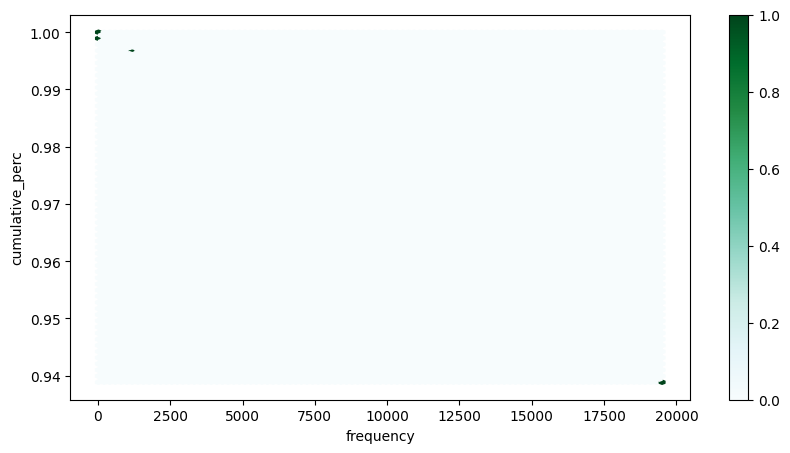

In [414]:
Filtro5_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

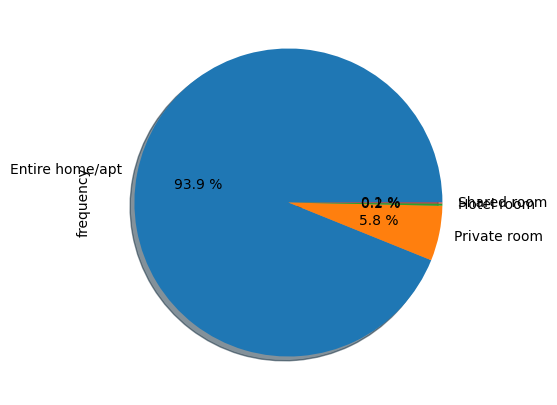

In [415]:
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='room_type'>

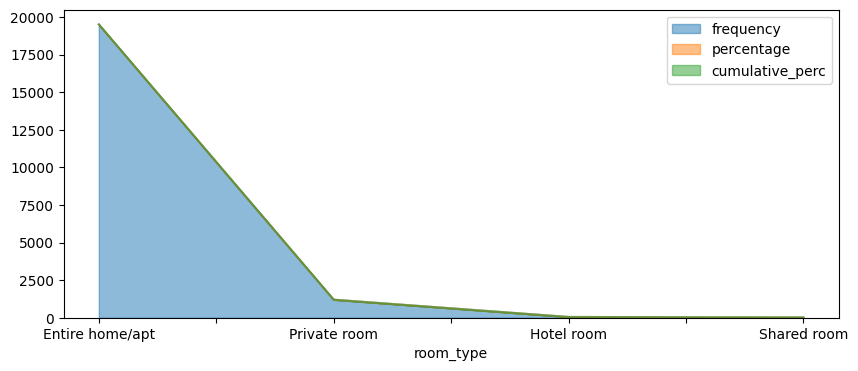

In [416]:
Filtro5_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

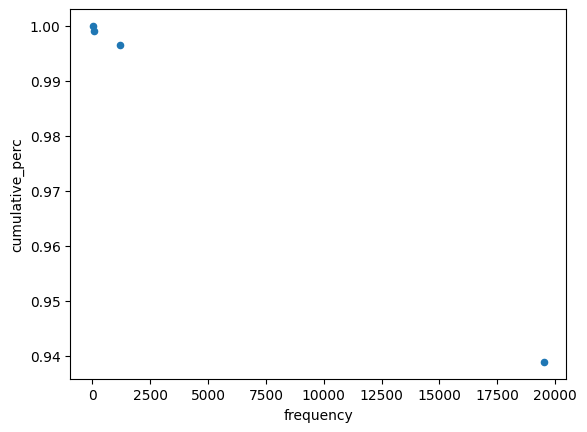

In [417]:
Filtro5_index.plot("frequency", "cumulative_perc", kind="scatter")

# **CALIFORNIA**

In [418]:
#Verificamos información del DataFrame
california.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6936 entries, 958.0 to 8.19e+17
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   6936 non-null   object 
 1   scrape_id                                     6936 non-null   float64
 2   last_scraped                                  6936 non-null   object 
 3   source                                        6936 non-null   object 
 4   name                                          6936 non-null   object 
 5   description                                   6889 non-null   object 
 6   neighborhood_overview                         4850 non-null   object 
 7   picture_url                                   6936 non-null   object 
 8   host_id                                       6936 non-null   int64  
 9   host_url                                      6936 no

In [419]:
#convertirmos la columna price en flotante y remplazamos $
california.price= california.price.replace({'\$':''}, regex = True)
california.price= california.price.replace({'\,':''}, regex = True)
california['price'] = california['price'].astype(float)

##**VALORES NULOS**

In [420]:
#Corroboramos valores nulos
california.isnull().sum().sum()

48877

In [421]:
#Separamos en dos dataframes valores cuantitativos y cualitativos
cuanC = espana.select_dtypes(include=[np.float, np.int])
cualiC = espana.select_dtypes(include=[np.object])

<ipython-input-421-113d05b3bbeb>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cuanC = espana.select_dtypes(include=[np.float, np.int])
<ipython-input-421-113d05b3bbeb>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c

In [422]:
#Checamos valores nulos
cualiC.isnull().sum()

listing_url                   0
last_scraped                  0
source                        0
name                          0
description                  22
neighborhood_overview     10532
picture_url                   0
host_url                      0
host_name                   113
host_since                  113
host_location              5134
host_about                 7995
host_response_time         1991
host_response_rate         1991
host_acceptance_rate       1040
host_is_superhost            15
host_thumbnail_url          113
host_picture_url            113
host_neighbourhood        17506
host_verifications            0
host_has_profile_pic        113
host_identity_verified      113
neighbourhood             10532
neighbourhood_cleansed        0
property_type                 0
room_type                     0
bathrooms_text               15
amenities                     0
has_availability              0
calendar_last_scraped         0
first_review               4290
last_rev

In [423]:
#Rellenamos con "--" los valores nulos, para que se entienda que no fueron rellenados y puedan ser encontrados de manera rapida
cualiC= cualiC.fillna("--")

In [424]:
#Verificamos valores nulos
cualiC.isnull().sum()

listing_url               0
last_scraped              0
source                    0
name                      0
description               0
neighborhood_overview     0
picture_url               0
host_url                  0
host_name                 0
host_since                0
host_location             0
host_about                0
host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_thumbnail_url        0
host_picture_url          0
host_neighbourhood        0
host_verifications        0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_cleansed    0
property_type             0
room_type                 0
bathrooms_text            0
amenities                 0
has_availability          0
calendar_last_scraped     0
first_review              0
last_review               0
license                   0
instant_bookable          0
dtype: int64

In [425]:
#Checamos valores nulos por columna
cuanC.isnull().sum()

scrape_id                                           0
host_id                                             0
host_listings_count                               113
host_total_listings_count                         113
neighbourhood_group_cleansed                    18693
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                       18693
bedrooms                                          492
beds                                               90
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              1
maximum_minimum_nights                              1
minimum_maximum_nights                              1
maximum_maximum_nights                              1
minimum_nights_avg_ntm      

In [426]:
#Rellenamos con la mediana solo las columnas que tienen 1 dato nulo, ya que esto no tendra mayor repercucion en procesos posteriores
cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]]=cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].fillna(round(cuanC[["minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm"]].median(),1))

In [427]:
#Rellenamos con 0 todos los demas datos ya que son grandes cantidades de datos nulos por columna
cuanC= cuanC.fillna(0)

In [428]:
#verificamos datos nulos
cuanC.isnull().sum()

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


##**OUTLIERS**

<Figure size 1500x800 with 0 Axes>

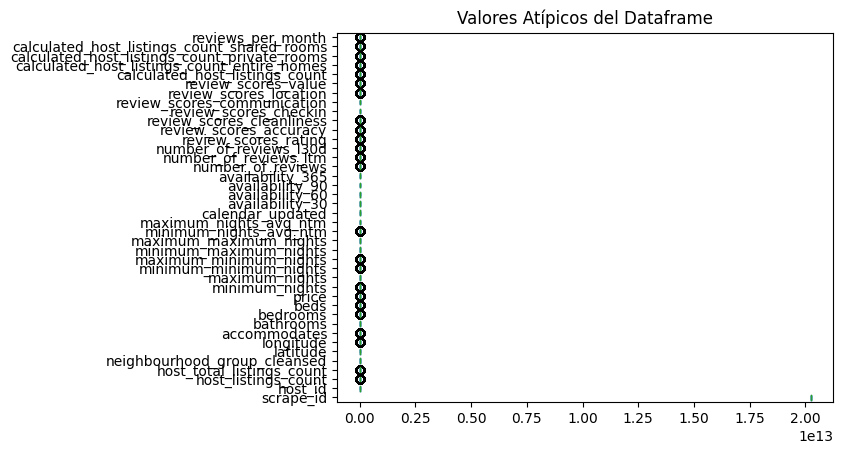

In [429]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuanC.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [430]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
#Este metodo se utiliza ya que lo he encontrado mas efectivo que el metodo de desviacion estandar, siendo que este metodo si elimina todos los outliers
#Por otro lado me parece adecuado ya que al utilizar cuartiles en un dataframe tan grande y simetrico ayuda a que exista un mejor resultado de este metodo
y=cuanC

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido scrape_id                                       2.023030e+13
host_id                                         5.131472e+08
host_listings_count                             1.485000e+02
host_total_listings_count                       2.145000e+02
neighbourhood_group_cleansed                    0.000000e+00
latitude                                        4.288189e+01
longitude                                       3.624385e+00
accommodates                                    9.000000e+00
bathrooms                                       0.000000e+00
bedrooms                                        6.000000e+00
beds                                            9.500000e+00
price                                           3.850000e+02
minimum_nights                                  1.100000e+01
maximum_nights                                  2.722500e+03
minimum_minimum_nights                          8.500000e+00
maximum_minimum_nights                          1.300000e+0

In [431]:
#Encontramos Outliers del Dataframe
outliers_iqr= cuanC[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

scrape_id  host_id  host_listings_count  \
id                                                      
1.455100e+04        NaN      NaN                  NaN   
1.205757e+06        NaN      NaN                  NaN   
1.212820e+06        NaN      NaN                  NaN   
7.516380e+05        NaN      NaN                  NaN   
4.134200e+04        NaN      NaN                  NaN   
...                 ...      ...                  ...   
8.332110e+17        NaN      NaN                  NaN   
8.286580e+17        NaN      NaN                  NaN   
8.286610e+17        NaN      NaN                  NaN   
8.202780e+17        NaN      NaN                  NaN   
8.332330e+17        NaN      NaN                  NaN   

              host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                      
1.455100e+04                        NaN                           NaN   
1.205757e+06                        NaN                           NaN   
1.212820e+06                        NaN                           NaN   
7.516380e+05                        NaN                           NaN   
4.134200e+04                        NaN                           NaN   
...                                 ...                           ...   
8.332110e+17                        NaN                           NaN   
8.286580e+17                        NaN                           NaN   
8.286610e+17                        NaN                           NaN   
8.202780e+17                        NaN                           NaN   
8.332330e+17                        NaN                           NaN   

              latitude  longitude  accommodates  bathrooms  bedrooms  ...  \
id                                                                    ...   
1.455100e+04       NaN        NaN           NaN        NaN       NaN  ...   
1.205757e+06       NaN        NaN           NaN        NaN       NaN  ...   
1.212820e+06       NaN        NaN           NaN        NaN       NaN  ...   
7.516380e+05       NaN        NaN           NaN        NaN       NaN  ...   
4.134200e+04       NaN        NaN           NaN        NaN       NaN  ...   
...                ...        ...           ...        ...       ...  ...   
8.332110e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.286580e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.286610e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.202780e+17       NaN        NaN           NaN        NaN       NaN  ...   
8.332330e+17       NaN        NaN           NaN        NaN       NaN  ...   

              review_scores_cleanliness  review_scores_checkin  \
id                                                               
1.455100e+04                        NaN                    NaN   
1.205757e+06                        NaN                    NaN   
1.212820e+06                        NaN                    NaN   
7.516380e+05                        NaN                    NaN   
4.134200e+04                        NaN                    NaN   
...                                 ...                    ...   
8.332110e+17                        0.0                    NaN   
8.286580e+17                        0.0                    NaN   
8.286610e+17                        0.0                    NaN   
8.202780e+17                        0.0                    NaN   
8.332330e+17                        0.0                    NaN   

              review_scores_communication  review_scores_location  \
id                                                                  
1.455100e+04                          NaN                     NaN   
1.205757e+06                          NaN                     NaN   
1.212820e+06                          NaN                     NaN   
7.516380e+05                          NaN                     NaN   
4.134200e+04                          NaN      

In [432]:
#Obtenemos datos limpios del Dataframe
cuanC= cuanC[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
cuanC

scrape_id    host_id  host_listings_count  \
id                                                           
1.455100e+04  2.023030e+13      57237                  1.0   
1.205757e+06  2.023030e+13    6586355                  1.0   
1.212820e+06  2.023030e+13    6620645                  2.0   
7.516380e+05  2.023030e+13    3680160                  6.0   
4.134200e+04  2.023030e+13     180072                  2.0   
...                    ...        ...                  ...   
8.332110e+17  2.023030e+13   24626866                 14.0   
8.286580e+17  2.023030e+13  354235559                  8.0   
8.286610e+17  2.023030e+13  354235559                  8.0   
8.202780e+17  2.023030e+13  158289157                  1.0   
8.332330e+17  2.023030e+13  369064535                  3.0   

              host_total_listings_count  neighbourhood_group_cleansed  \
id                                                                      
1.455100e+04                        5.0                           0.0   
1.205757e+06                        1.0                           0.0   
1.212820e+06                        3.0                           0.0   
7.516380e+05                        6.0                           0.0   
4.134200e+04                        3.0                           0.0   
...                                 ...                           ...   
8.332110e+17                       31.0                           0.0   
8.286580e+17                        8.0                           0.0   
8.286610e+17                        8.0                           0.0   
8.202780e+17                        1.0                           0.0   
8.332330e+17                        3.0                           0.0   

               latitude  longitude  accommodates  bathrooms  bedrooms  ...  \
id                                                                     ...   
1.455100e+04  41.996500   2.836460           2.0        0.0       1.0  ...   
1.205757e+06  41.793040   2.774120           2.0        0.0       1.0  ...   
1.212820e+06  42.112840   3.166700           4.0        0.0       1.0  ...   
7.516380e+05  42.369580   2.980300           2.0        0.0       1.0  ...   
4.134200e+04  42.346550   3.204630           4.0        0.0       1.0  ...   
...                 ...        ...           ...        ...       ...  ...   
8.332110e+17  41.704149   2.864513           6.0        0.0       2.0  ...   
8.286580e+17  42.247053   3.197873           4.0        0.0       2.0  ...   
8.286610e+17  42.247472   3.197150           5.0        0.0       3.0  ...   
8.202780e+17  42.253723   3.184175           2.0        0.0       1.0  ...   
8.332330e+17  42.265592   3.165072           4.0        0.0       2.0  ...   

              review_scores_cleanliness  review_scores_checkin  \
id                                                               
1.455100e+04                       4.94                   4.89   
1.205757e+06                       4.85                   4.85   
1.212820e+06                       4.31                   4.81   
7.516380e+05                       4.50                   4.86   
4.134200e+04                       4.82                   4.73   
...                                 ...                    ...   
8.332110e+17                        NaN                   0.00   
8.286580e+17                        NaN                   0.00   
8.286610e+17                        NaN                   0.00   
8.202780e+17                        NaN                   0.00   
8.332330e+17                        NaN                   0.00   

              review_scores_communication  review_scores_location  \
id                                                                  
1.455100e+04                         4.91                    4.63   
1.205757e+06                         4.91                    4.69   
1.212820e+06                         4.76                    4.74   
7.516380e+05                         5.00

In [433]:
#Corroboramos valores nulos del dataframe LIMPIO
cuanC.isnull().sum()

scrape_id                                          0
host_id                                            0
host_listings_count                             1804
host_total_listings_count                       2295
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                        895
accommodates                                    1541
bathrooms                                          0
bedrooms                                         279
beds                                             545
price                                           1821
minimum_nights                                   434
maximum_nights                                     0
minimum_minimum_nights                           417
maximum_minimum_nights                           972
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                        

In [434]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
cuanC=cuanC.fillna(round(cuanC.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=cuanC.isnull().sum()
valores_nulos

scrape_id                                       0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0


In [435]:
#Realizamos un merge de las dos dataframes limpias
california2=pd.merge(cualiC,cuanC , left_index=True, right_index=True, how='outer')
california2.head()

listing_url last_scraped           source  \
id                                                                          
14551.0  https://www.airbnb.com/rooms/14551   31/03/2023      city scrape   
41342.0  https://www.airbnb.com/rooms/41342   01/04/2023  previous scrape   
45400.0  https://www.airbnb.com/rooms/45400   01/04/2023      city scrape   
48764.0  https://www.airbnb.com/rooms/48764   31/03/2023      city scrape   
93343.0  https://www.airbnb.com/rooms/93343   01/04/2023      city scrape   

                                                      name  \
id                                                           
14551.0           Cozy & Colorful by Nature (Private Room)   
41342.0                  Beachfront Tamariua (Costa Brava)   
45400.0                 Begur - Loft - Costa Brava - SPAIN   
48764.0                18th C Stone House near Costa Brava   
93343.0  Alquiler de casa en La Costa Brava cerca de playa   

                                               description  \
id                                                           
14551.0  Up in the hill of MontjuÃ¯c (a mountain overlo...   
41342.0  A little paradise by the sea. Apartment 2/4 ad...   
45400.0  <b>The space</b><br />Flat / Apartment. New. P...   
48764.0  Casa Fluvia is a charming stone village house ...   
93343.0  Siguiendo con nuestra linea de alojamientos co...   

                                     neighborhood_overview  \
id                                                           
14551.0  MontjuÃ¯c is most likely the best neighborhood...   
41342.0  Apartment located outside the town on a small ...   
45400.0                                                 --   
48764.0  Torroella de FluviÃ¡ is a small peaceful rural...   
93343.0  Localizada a:<br />Playa : 700 m<br />Supermer...   

                                               picture_url  \
id                                                           
14551.0  https://a0.muscache.com/pictures/16209908/f1fe...   
41342.0  https://a0.muscache.com/pictures/70414801/59d4...   
45400.0  https://a0.muscache.com/pictures/2206667/ea3bd...   
48764.0  https://a0.muscache.com/pictures/19824290/9c7a...   
93343.0  https://a0.muscache.com/pictures/6656368/7038d...   

                                         host_url     host_name  host_since  \
id                                                                            
14551.0   https://www.airbnb.com/users/show/57237           Mun  24/11/2009   
41342.0  https://www.airbnb.com/users/show/180072        Marisa  25/07/2010   
45400.0  https://www.airbnb.com/users/show/201228         Oscar  14/08/2010   
48764.0  https://www.airbnb.com/users/show/220145  Dick And Ann  01/09/2010   
93343.0  https://www.airbnb.com/users/show/477826     Francisco  01/04/2011   

         ... review_scores_cleanliness review_scores_checkin  \
id       ...                                                   
14551.0  ...                      4.94                  4.89   
41342.0  ...                      4.82                  4.73   
45400.0  ...                      4.73                  4.93   
48764.0  ...                      4.88                  4.97   
93343.0  ...                      4.50                  0.00   

        review_scores_communication review_scores_location  \
id                                                           
14551.0                        4.91                   4.63   
41342.0                        4.73                   4.91   
45400.0                        4.94                   4.89   
48764.0                        4.97                   4.70   
93343.0                        0.00                   4.70   

        review_scores_value calculated_host_listings_count  \
id                                                           
14551.0                4.74                            1.0   
41342.0                4.36                            1.0   
45400.0                4.70                            1.0   
4876

In [436]:
#Verificamos datos nulos
california2.isnull().sum().sum()

0

##**FILTROS**

In [437]:
california2.columns

Index(['listing_url', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review', 'license',
       'instant_bookable', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maxi

In [438]:
filtro1C= california2[california2['host_acceptance_rate'] > '50%']
filtro1C['host_acceptance_rate']

id
1.455100e+04    90%
4.876400e+04    80%
1.067040e+05    65%
1.219620e+05    65%
1.222730e+05    65%
               ... 
8.286610e+17    96%
8.331220e+17    52%
8.332020e+17    98%
8.332110e+17    90%
8.332330e+17    96%
Name: host_acceptance_rate, Length: 10182, dtype: object

In [439]:
filtro2C= california2[california2['host_is_superhost']== "t"]
filtro2C['host_is_superhost']

id
1.455100e+04    t
4.540000e+04    t
1.067040e+05    t
1.219620e+05    t
1.222730e+05    t
               ..
8.266070e+17    t
8.266230e+17    t
8.269070e+17    t
8.286580e+17    t
8.286610e+17    t
Name: host_is_superhost, Length: 3082, dtype: object

In [440]:
filtro3C= california2[california2['host_identity_verified']== "f"]
filtro3C['host_identity_verified']

id
1.792200e+05    f
2.541000e+05    f
2.730370e+05    f
2.965630e+05    f
3.590560e+05    f
               ..
8.077040e+17    f
8.194830e+17    f
8.208140e+17    f
8.209610e+17    f
8.223700e+17    f
Name: host_identity_verified, Length: 2302, dtype: object

In [441]:
california2['property_type'].unique()

array(['Private room in condo', 'Entire rental unit', 'Entire home',
       'Entire villa', 'Farm stay', 'Entire townhouse', 'Entire loft',
       'Private room in home', 'Entire condo',
       'Private room in guest suite', 'Private room in townhouse',
       'Entire cottage', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Entire guest suite',
       'Private room in rental unit', 'Entire chalet', 'Castle',
       'Private room in loft', 'Entire cabin',
       'Private room in farm stay', 'Hut', 'Private room in cottage',
       'Private room in villa', 'Barn', 'Private room',
       'Entire vacation home', 'Private room in chalet',
       'Shared room in home', 'Entire bungalow',
       'Entire serviced apartment', 'Private room in bungalow',
       'Casa particular', 'Private room in guesthouse',
       'Entire bed and breakfast', 'Tiny home',
       'Private room in serviced apartment',
       'Private room in casa particular', 'Earthen home',
       'Room in ser

In [442]:
filtro4C= california2[(california2['property_type']== 'Private room')|(california2['property_type']=='Room in hotel')]
filtro4C['property_type']

id
3.054347e+06     Private room
1.461311e+07     Private room
1.711768e+07     Private room
1.901004e+07    Room in hotel
1.901004e+07    Room in hotel
                    ...      
8.157460e+17    Room in hotel
8.179910e+17    Room in hotel
8.214490e+17    Room in hotel
8.214840e+17    Room in hotel
8.222360e+17    Room in hotel
Name: property_type, Length: 199, dtype: object

In [443]:
california2['bathrooms']

id
1.455100e+04    0.0
4.134200e+04    0.0
4.540000e+04    0.0
4.876400e+04    0.0
9.334300e+04    0.0
               ... 
8.331220e+17    0.0
8.331510e+17    0.0
8.332020e+17    0.0
8.332110e+17    0.0
8.332330e+17    0.0
Name: bathrooms, Length: 20775, dtype: float64

In [444]:
filtro5C= california2[california2['bathrooms']>1]
filtro5C

Empty DataFrame
Columns: [listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, property_type, room_type, bathrooms_text, amenities, has_availability, calendar_last_scraped, first_review, last_review, license, instant_bookable, scrape_id, host_id, host_listings_count, host_total_listings_count, neighbourhood_group_cleansed, latitude, longitude, accommodates, bathrooms, bedrooms, beds, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 74 columns]

In [445]:
filtro6C= california2[(california2['price'] > 10000) & (california2["property_type"] == "Entire home")]
filtro6C[['price', 'property_type']]

Empty DataFrame
Columns: [price, property_type]
Index: []

In [446]:
filtro7C= california2[california2['review_scores_cleanliness']>4.5]
filtro7C['review_scores_cleanliness']

id
1.455100e+04    4.94
4.134200e+04    4.82
4.540000e+04    4.73
4.876400e+04    4.88
1.015800e+05    4.73
                ... 
8.251120e+17    5.00
8.258600e+17    5.00
8.258890e+17    5.00
8.261090e+17    5.00
8.266380e+17    5.00
Name: review_scores_cleanliness, Length: 9617, dtype: float64

In [447]:
filtro8C= california2[california2['review_scores_value']>4.9]
filtro8C['review_scores_value']

id
4.382430e+05    4.93
6.843860e+05    4.92
7.743710e+05    4.92
8.091360e+05    5.00
9.343500e+05    5.00
                ... 
8.251120e+17    5.00
8.258890e+17    5.00
8.261090e+17    5.00
8.266380e+17    5.00
8.280870e+17    5.00
Name: review_scores_value, Length: 2677, dtype: float64

In [448]:
filtro9C= california2[california2['availability_365']<100]
filtro9C['availability_365']

id
4.134200e+04     0
4.876400e+04    28
9.334300e+04    84
1.688320e+05    47
1.792200e+05     0
                ..
8.274170e+17    62
8.276300e+17    96
8.279140e+17     0
8.279830e+17    50
8.332020e+17    62
Name: availability_365, Length: 5180, dtype: int64

In [449]:
filtro10C= california2[california2['host_response_time']== 'within an hour']
filtro10C['host_response_time']

id
1.455100e+04    within an hour
4.540000e+04    within an hour
1.015800e+05    within an hour
1.216660e+05    within an hour
1.223710e+05    within an hour
                     ...      
8.286580e+17    within an hour
8.286610e+17    within an hour
8.331510e+17    within an hour
8.332020e+17    within an hour
8.332330e+17    within an hour
Name: host_response_time, Length: 12618, dtype: object

##**TABLAS DE FRECUENCIA**

In [450]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(california2)

                                           listing_url  frequency  percentage  \
0      https://www.airbnb.com/rooms/811375209925117773         19    0.000915   
1      https://www.airbnb.com/rooms/811375079415863857         19    0.000915   
2      https://www.airbnb.com/rooms/811374501206598444         19    0.000915   
3      https://www.airbnb.com/rooms/811374512259496418         19    0.000915   
4      https://www.airbnb.com/rooms/811374615087867103         19    0.000915   
...                                                ...        ...         ...   
18688            https://www.airbnb.com/rooms/24842529          1    0.000048   
18689            https://www.airbnb.com/rooms/24841381          1    0.000048   
18690            https://www.airbnb.com/rooms/24841118          1    0.000048   
18691            https://www.airbnb.com/rooms/24839231          1    0.000048   
18692  https://www.airbnb.com/rooms/833232870880503395          1    0.000048   

       cumulative_perc  
0 

In [451]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(california2['source'])
table1

source  frequency  percentage  cumulative_perc
0      city scrape      19472     0.93728          0.93728
1  previous scrape       1303     0.06272          1.00000

In [452]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro1= table1[table1['frequency']>1]
Filtro1

source  frequency  percentage  cumulative_perc
0      city scrape      19472     0.93728          0.93728
1  previous scrape       1303     0.06272          1.00000

In [453]:
#Ajusto el indice de mi dataframe
Filtro1_index= Filtro1.set_index('source')
Filtro1_index

frequency  percentage  cumulative_perc
source                                                 
city scrape          19472     0.93728          0.93728
previous scrape       1303     0.06272          1.00000

Text(0, 0.5, 'Frecuencia')

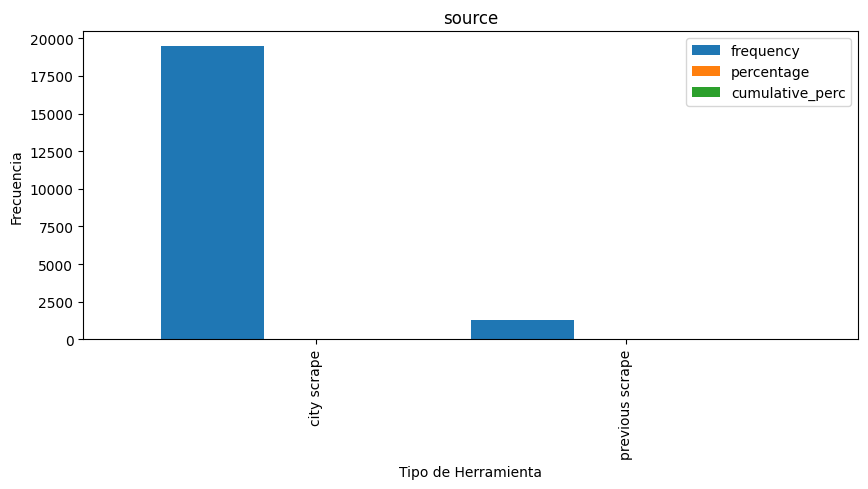

In [454]:
#Realizamos grafico de barras del dataframe filtrado
Filtro1_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('source')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

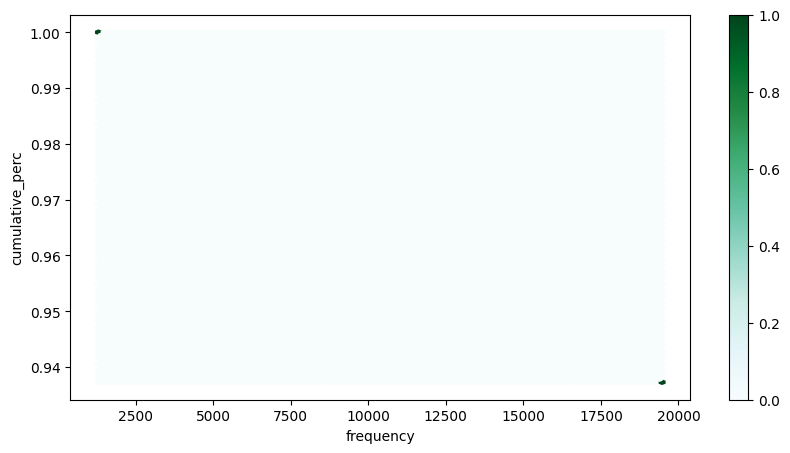

In [455]:
Filtro1_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

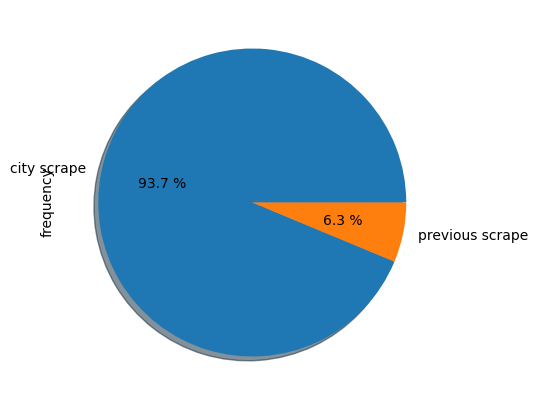

In [456]:
Filtro1_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='source'>

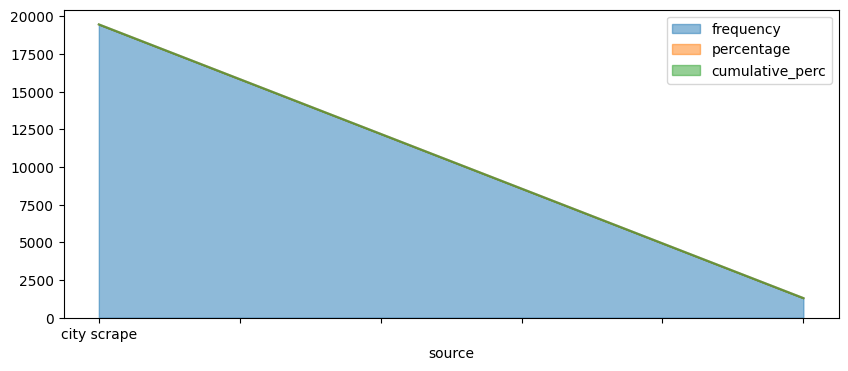

In [457]:
Filtro1_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

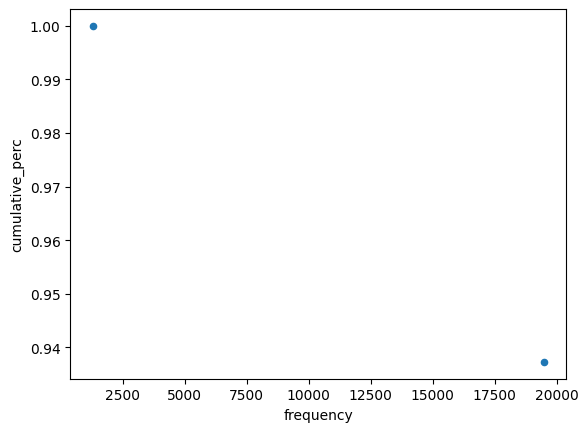

In [458]:
Filtro1_index.plot("frequency", "cumulative_perc", kind="scatter")

In [459]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(california2['property_type'])
table2

property_type  frequency  percentage  cumulative_perc
0            Entire rental unit      10101    0.486209         0.486209
1                   Entire home       3946    0.189940         0.676149
2                  Entire villa       1832    0.088183         0.764332
3                  Entire condo       1399    0.067341         0.831673
4                Entire cottage        565    0.027196         0.858869
..                          ...        ...         ...              ...
68          Private room in hut          1    0.000048         0.999807
69     Entire bed and breakfast          1    0.000048         0.999856
70        Private room in cabin          1    0.000048         0.999904
71  Shared room in nature lodge          1    0.000048         0.999952
72         Private room in tent          1    0.000048         1.000000

[73 rows x 4 columns]

In [460]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro2= table2[table2['frequency']>1]
Filtro2

property_type  frequency  percentage  cumulative_perc
0         Entire rental unit      10101    0.486209         0.486209
1                Entire home       3946    0.189940         0.676149
2               Entire villa       1832    0.088183         0.764332
3               Entire condo       1399    0.067341         0.831673
4             Entire cottage        565    0.027196         0.858869
..                       ...        ...         ...              ...
58      Private room in loft          2    0.000096         0.999134
59  Private room in windmill          2    0.000096         0.999230
60      Private room in boat          2    0.000096         0.999326
61  Private room in bungalow          2    0.000096         0.999422
62      Private room in barn          2    0.000096         0.999519

[63 rows x 4 columns]

In [461]:
#Ajusto el indice de mi dataframe
Filtro2_index= Filtro2.set_index('property_type')
Filtro2_index

frequency  percentage  cumulative_perc
property_type                                                   
Entire rental unit            10101    0.486209         0.486209
Entire home                    3946    0.189940         0.676149
Entire villa                   1832    0.088183         0.764332
Entire condo                   1399    0.067341         0.831673
Entire cottage                  565    0.027196         0.858869
...                             ...         ...              ...
Private room in loft              2    0.000096         0.999134
Private room in windmill          2    0.000096         0.999230
Private room in boat              2    0.000096         0.999326
Private room in bungalow          2    0.000096         0.999422
Private room in barn              2    0.000096         0.999519

[63 rows x 3 columns]

Text(0, 0.5, 'Frecuencia')

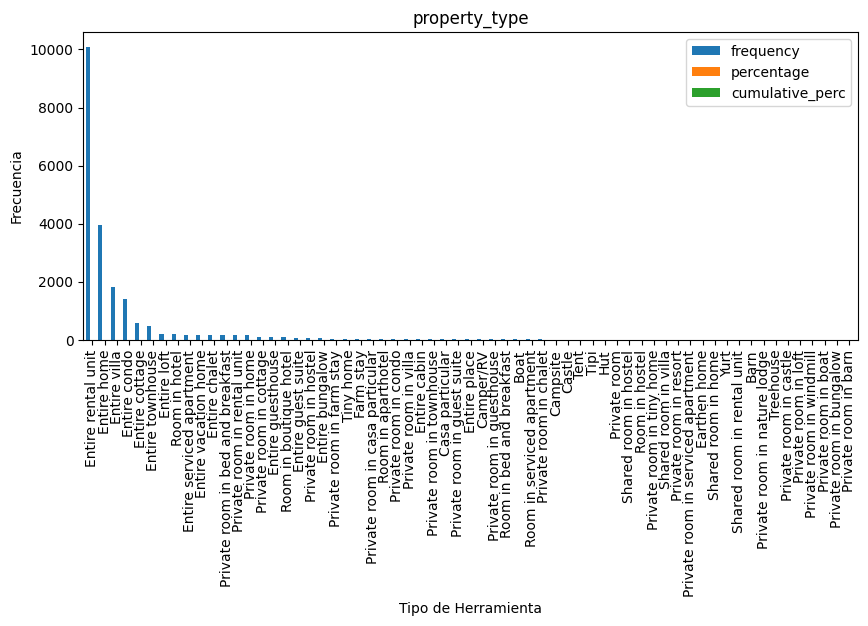

In [462]:
#Realizamos grafico de barras del dataframe filtrado
Filtro2_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('property_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

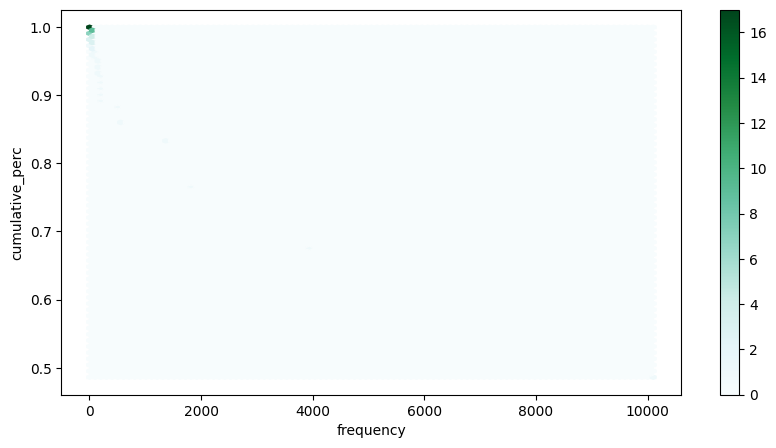

In [463]:
Filtro2_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

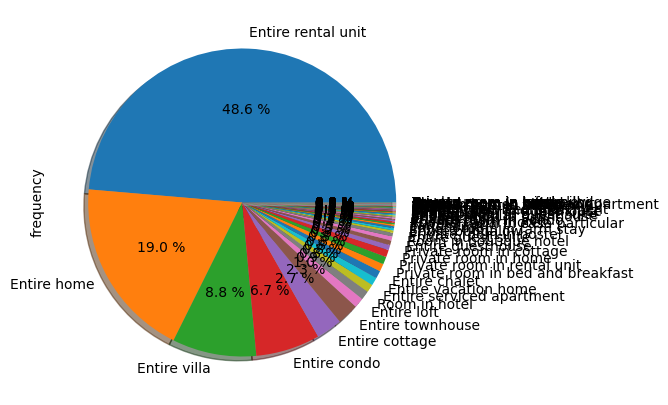

In [464]:
Filtro2_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='property_type'>

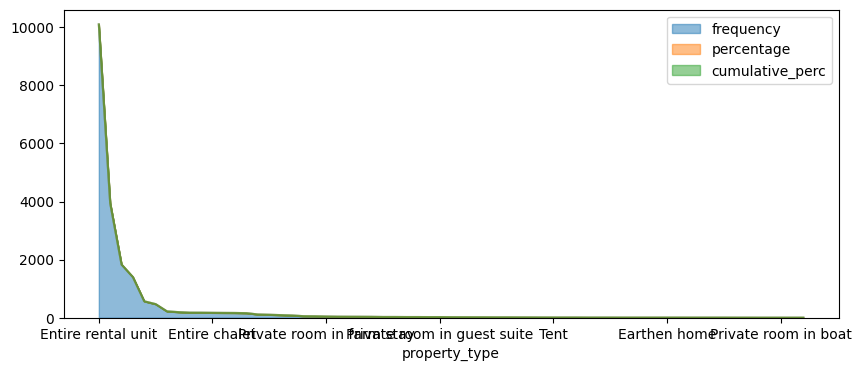

In [465]:
Filtro2_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

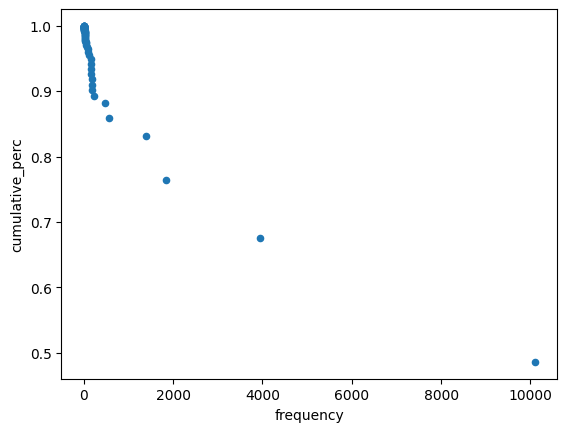

In [466]:
Filtro2_index.plot("frequency", "cumulative_perc", kind="scatter")

In [467]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(california2['host_response_time'])
table3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      12618    0.607365         0.607365
1                  --       2769    0.133285         0.740650
2  within a few hours       2681    0.129049         0.869699
3        within a day       2298    0.110614         0.980313
4  a few days or more        409    0.019687         1.000000

In [468]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro3= table3[table3['frequency']>1]
Filtro3

host_response_time  frequency  percentage  cumulative_perc
0      within an hour      12618    0.607365         0.607365
1                  --       2769    0.133285         0.740650
2  within a few hours       2681    0.129049         0.869699
3        within a day       2298    0.110614         0.980313
4  a few days or more        409    0.019687         1.000000

In [469]:
#Ajusto el indice de mi dataframe
Filtro3_index= Filtro3.set_index('host_response_time')
Filtro3_index

frequency  percentage  cumulative_perc
host_response_time                                        
within an hour          12618    0.607365         0.607365
--                       2769    0.133285         0.740650
within a few hours       2681    0.129049         0.869699
within a day             2298    0.110614         0.980313
a few days or more        409    0.019687         1.000000

Text(0, 0.5, 'Frecuencia')

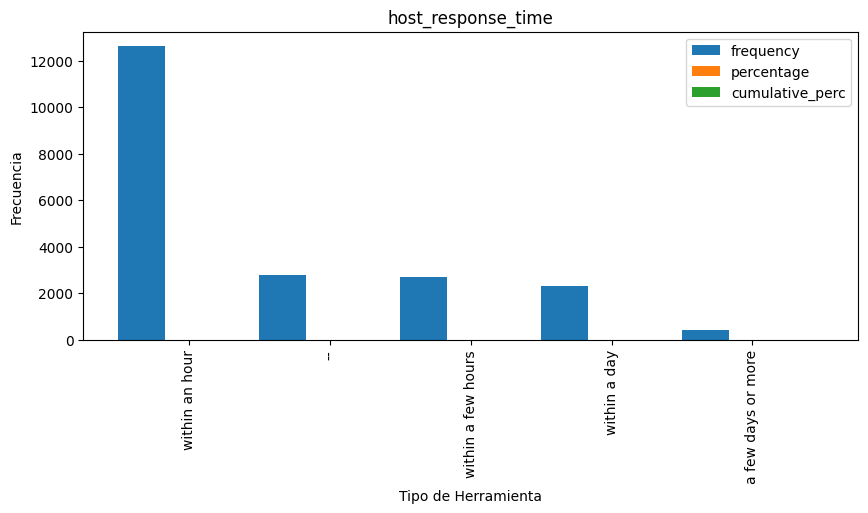

In [470]:
#Realizamos grafico de barras del dataframe filtrado
Filtro3_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_response_time')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

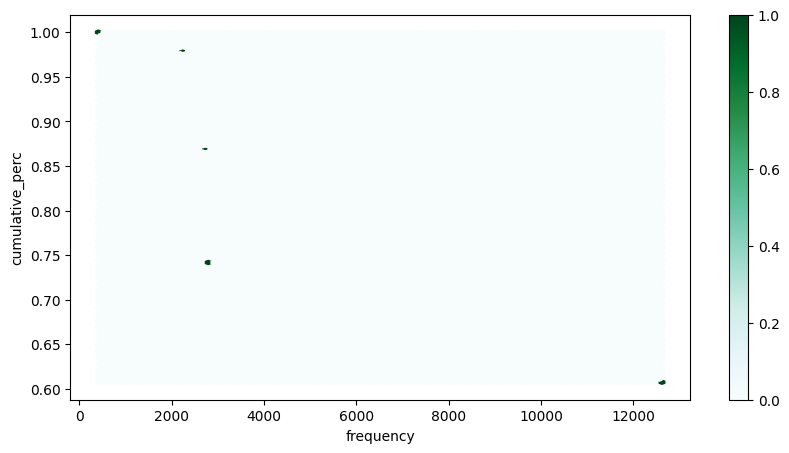

In [471]:
Filtro3_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

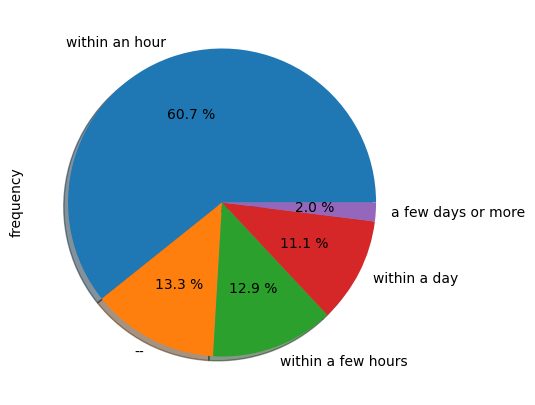

In [472]:
Filtro3_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_response_time'>

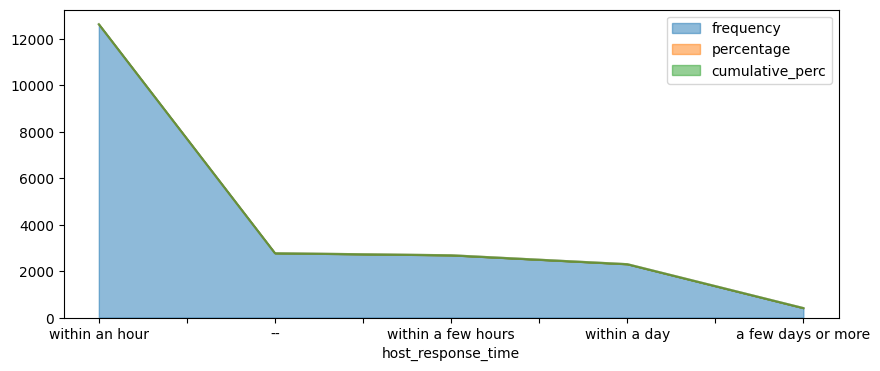

In [473]:
Filtro3_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

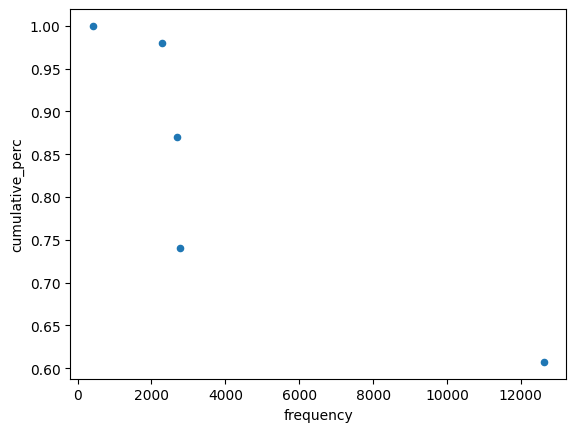

In [474]:
Filtro3_index.plot("frequency", "cumulative_perc", kind="scatter")

In [475]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(california2['host_is_superhost'])
table4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      17678    0.850927         0.850927
1                 t       3082    0.148351         0.999278
2                --         15    0.000722         1.000000

In [476]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro4= table4[table4['frequency']>1]
Filtro4

host_is_superhost  frequency  percentage  cumulative_perc
0                 f      17678    0.850927         0.850927
1                 t       3082    0.148351         0.999278
2                --         15    0.000722         1.000000

In [477]:
#Ajusto el indice de mi dataframe
Filtro4_index= Filtro4.set_index('host_is_superhost')
Filtro4_index

frequency  percentage  cumulative_perc
host_is_superhost                                        
f                      17678    0.850927         0.850927
t                       3082    0.148351         0.999278
--                        15    0.000722         1.000000

Text(0, 0.5, 'Frecuencia')

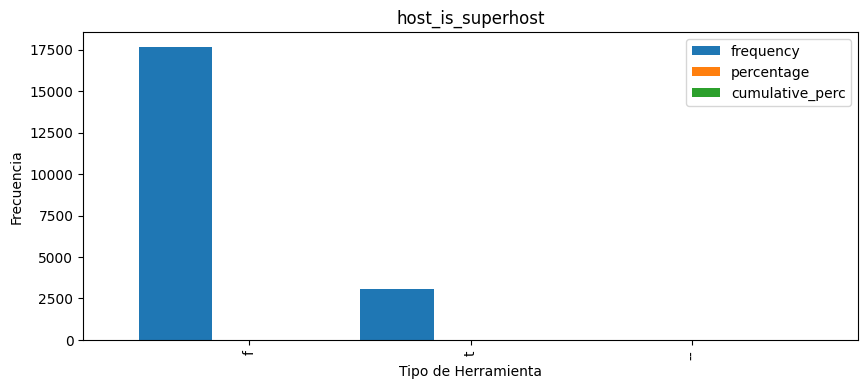

In [478]:
#Realizamos grafico de barras del dataframe filtrado
Filtro4_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('host_is_superhost')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

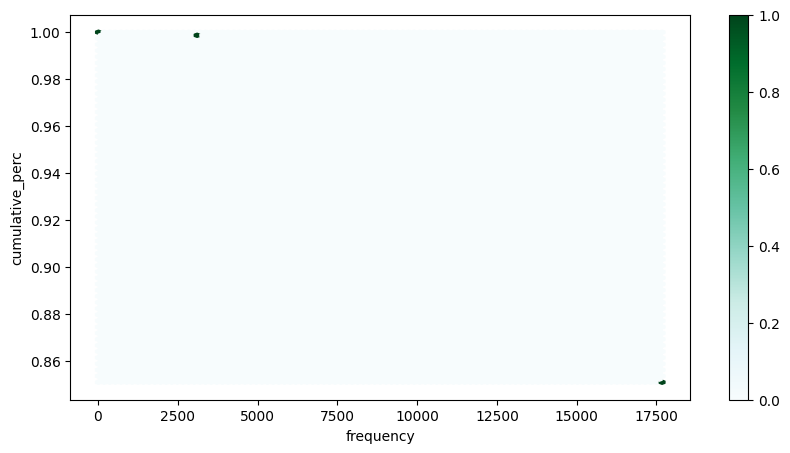

In [479]:
Filtro4_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

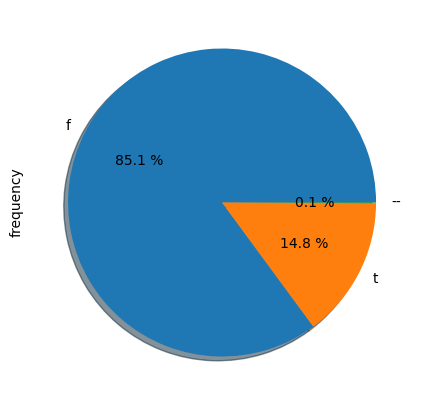

In [480]:
Filtro4_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='host_is_superhost'>

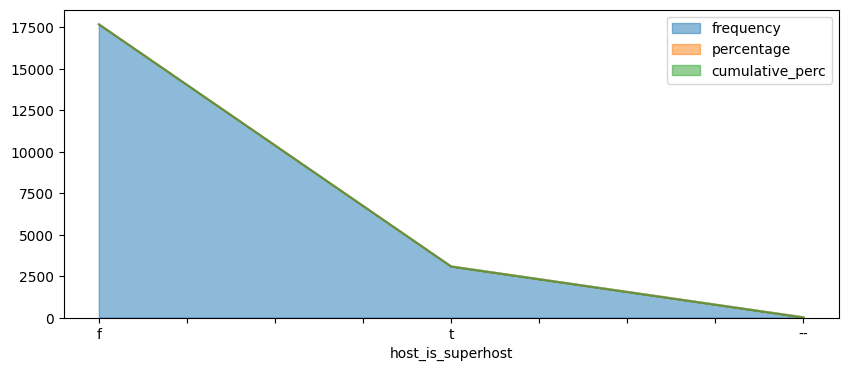

In [481]:
Filtro4_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

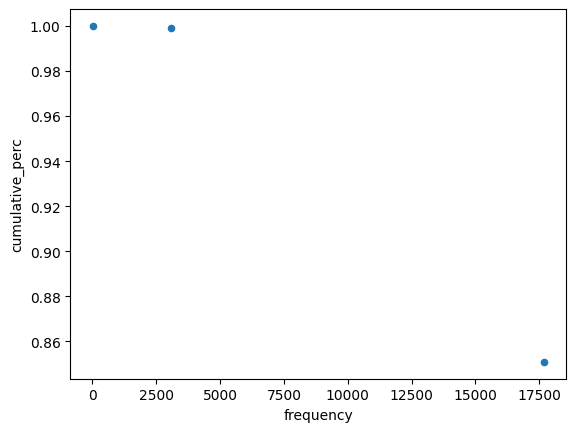

In [482]:
Filtro4_index.plot("frequency", "cumulative_perc", kind="scatter")

In [483]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(california2['room_type'])
table5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      19505    0.938869         0.938869
1     Private room       1199    0.057714         0.996582
2       Hotel room         50    0.002407         0.998989
3      Shared room         21    0.001011         1.000000

In [484]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro5= table5[table5['frequency']>1]
Filtro5

room_type  frequency  percentage  cumulative_perc
0  Entire home/apt      19505    0.938869         0.938869
1     Private room       1199    0.057714         0.996582
2       Hotel room         50    0.002407         0.998989
3      Shared room         21    0.001011         1.000000

In [485]:
#Ajusto el indice de mi dataframe
Filtro5_index= Filtro5.set_index('room_type')
Filtro5_index

frequency  percentage  cumulative_perc
room_type                                              
Entire home/apt      19505    0.938869         0.938869
Private room          1199    0.057714         0.996582
Hotel room              50    0.002407         0.998989
Shared room             21    0.001011         1.000000

Text(0, 0.5, 'Frecuencia')

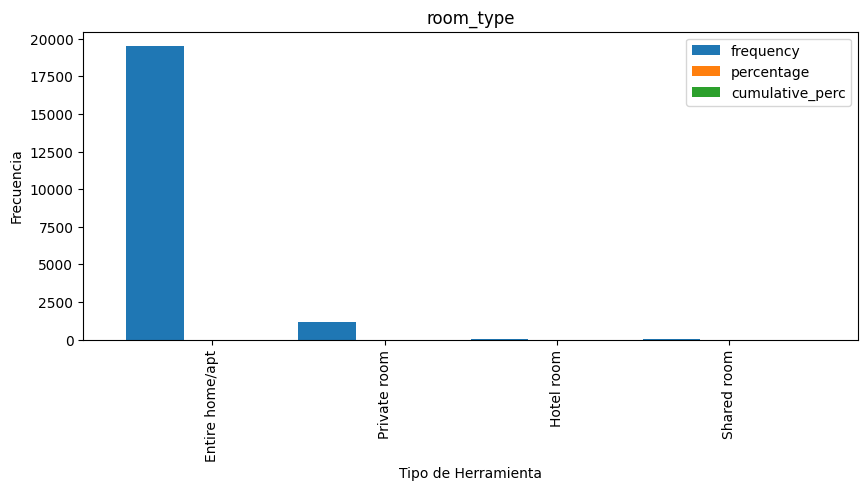

In [486]:
#Realizamos grafico de barras del dataframe filtrado
Filtro5_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('room_type')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

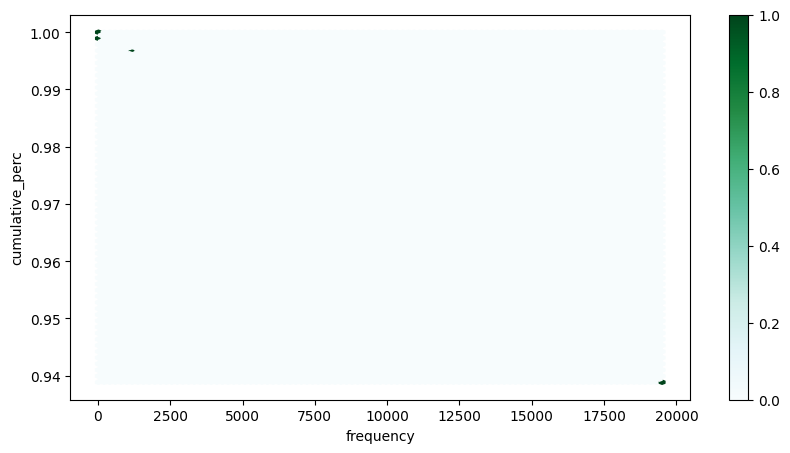

In [487]:
Filtro5_index.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

<Axes: ylabel='frequency'>

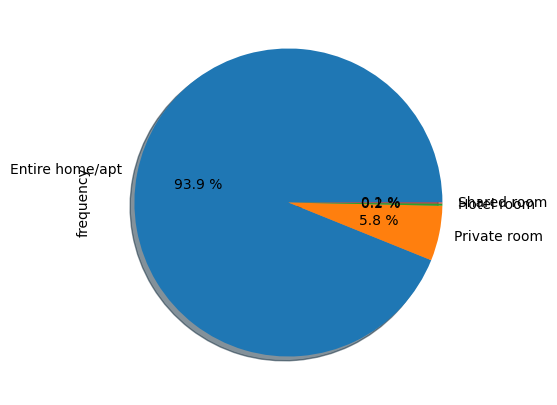

In [488]:
Filtro5_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='room_type'>

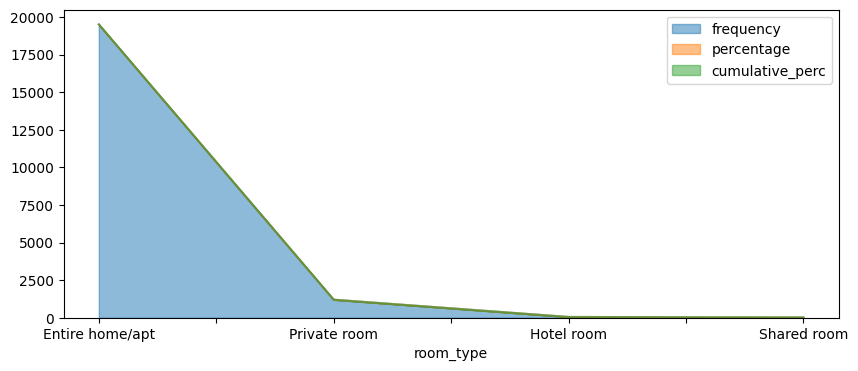

In [489]:
Filtro5_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

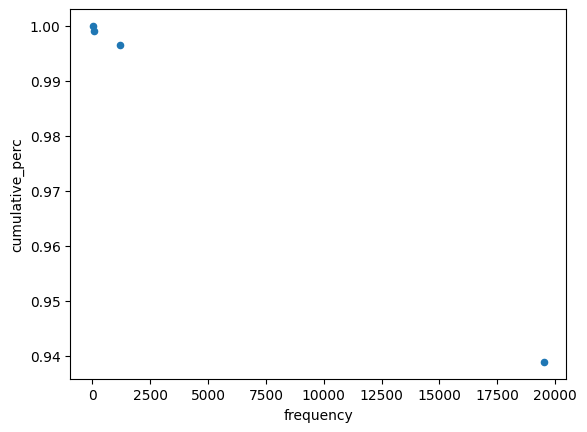

In [490]:
Filtro5_index.plot("frequency", "cumulative_perc", kind="scatter")

#**DESCARGAS**

In [491]:
#Convertir archivo filtrado a CSV
#mexico2.to_csv("MexicoClean.csv")
#espana2.to_csv("EspañaClean.csv")
#california2.to_csv("CaliforniaClean.csv")

In [492]:
#Convertir archivo filtrado a CSV
#filtro1M.to_csv("filtro1M.csv")
#filtro2M.to_csv("filtro2M.csv")
#filtro3M.to_csv("filtro3M.csv")
#filtro4M.to_csv("filtro4M.csv")
#filtro5M.to_csv("filtro5M.csv")
#filtro6M.to_csv("filtro6M.csv")
#filtro7M.to_csv("filtro7M.csv")
#filtro8M.to_csv("filtro8M.csv")
#filtro9M.to_csv("filtro9M.csv")
#filtro10M.to_csv("filtro10M.csv")

In [493]:
#Convertir archivo filtrado a CSV
#filtro1E.to_csv("filtro1E.csv")
#filtro2E.to_csv("filtro2E.csv")
#filtro3E.to_csv("filtro3E.csv")
#filtro4E.to_csv("filtro4E.csv")
#filtro5E.to_csv("filtro5E.csv")
#filtro6E.to_csv("filtro6E.csv")
#filtro7E.to_csv("filtro7E.csv")
#filtro8E.to_csv("filtro8E.csv")
#filtro9E.to_csv("filtro9E.csv")
#filtro10E.to_csv("filtro10E.csv")

In [494]:
#Convertir archivo filtrado a CSV
#filtro1C.to_csv("filtro1C.csv")
#filtro2C.to_csv("filtro2C.csv")
#filtro3C.to_csv("filtro3C.csv")
#filtro4C.to_csv("filtro4C.csv")
#filtro5C.to_csv("filtro5C.csv")
#filtro6C.to_csv("filtro6C.csv")
#filtro7C.to_csv("filtro7C.csv")
#filtro8C.to_csv("filtro8C.csv")
#filtro9C.to_csv("filtro9C.csv")
#filtro10C.to_csv("filtro10C.csv")

In [495]:
#descardar archivo filtrado en csv   
#files.download("filtro1M.csv")
#files.download("filtro2M.csv")
#files.download("filtro3M.csv")
#files.download("filtro4M.csv")
#files.download("filtro5M.csv")
#files.download("filtro6M.csv")
#files.download("filtro7M.csv")
#files.download("filtro8M.csv")
#files.download("filtro9M.csv")
#files.download("filtro10M.csv")

In [496]:
#descardar archivo filtrado en csv   
#files.download("filtro1E.csv")
#files.download("filtro2E.csv")
#files.download("filtro3E.csv")
#files.download("filtro4E.csv")
#files.download("filtro5E.csv")
#files.download("filtro6E.csv")
#files.download("filtro7E.csv")
#files.download("filtro8E.csv")
#files.download("filtro9E.csv")
#files.download("filtro10E.csv")

In [497]:
#files.download("filtro1E.csv")
#files.download("filtro7E.csv")
#files.download("filtro10E.csv")

In [498]:
#descardar archivo filtrado en csv    
#files.download("filtro1C.csv")
#files.download("filtro2C.csv")
#files.download("filtro3C.csv")
#files.download("filtro4C.csv")
#files.download("filtro5C.csv")
#files.download("filtro6C.csv")
#files.download("filtro7C.csv")
#files.download("filtro8C.csv")
#files.download("filtro9C.csv")
#files.download("filtro10C.csv")